In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from imblearn.over_sampling import SMOTE

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
import joblib
import warnings
warnings.filterwarnings("ignore")

In [7]:
df = pd.read_csv("credit_risk_dataset.csv", skipinitialspace = True)
df

person_age  person_income person_home_ownership  person_emp_length  \
0              22          59000                  RENT              123.0   
1              21           9600                   OWN                5.0   
2              25           9600              MORTGAGE                1.0   
3              23          65500                  RENT                4.0   
4              24          54400                  RENT                8.0   
...           ...            ...                   ...                ...   
32576          57          53000              MORTGAGE                1.0   
32577          54         120000              MORTGAGE                4.0   
32578          65          76000                  RENT                3.0   
32579          56         150000              MORTGAGE                5.0   
32580          66          42000                  RENT                2.0   

           loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
0             PERSONAL          D      35000          16.02            1   
1            EDUCATION          B       1000          11.14            0   
2              MEDICAL          C       5500          12.87            1   
3              MEDICAL          C      35000          15.23            1   
4              MEDICAL          C      35000          14.27            1   
...                ...        ...        ...            ...          ...   
32576         PERSONAL          C       5800          13.16            0   
32577         PERSONAL          A      17625           7.49            0   
32578  HOMEIMPROVEMENT          B      35000          10.99            1   
32579         PERSONAL          B      15000          11.48            0   
32580          MEDICAL          B       6475           9.99            0   

       loan_percent_income cb_person_default_on_file  \
0                     0.59                         Y   
1                     0.10                         N   
2                     0.57                         N   
3                     0.53                         N   
4                     0.55                         Y   
...                    ...                       ...   
32576                 0.11                         N   
32577                 0.15                         N   
32578                 0.46                         N   
32579                 0.10                         N   
32580                 0.15                         N   

       cb_person_cred_hist_length  
0                               3  
1                               2  
2                               3  
3                               2  
4                               4  
...                           ...  
32576                          30  
32577                          19  
32578                          28  
32579                          26  
32580                          30  

[32581 rows x 12 columns]

In [9]:
# xem ngẫu nhiên 6 dòng
df.sample(6)


person_age  person_income person_home_ownership  person_emp_length  \
13762          25          68000                  RENT                2.0   
30642          39          60000                  RENT                3.0   
7473           25          53000              MORTGAGE                2.0   
23315          28          61425                   OWN                2.0   
3389           25          50000                  RENT                0.0   
21883          29          50000              MORTGAGE               11.0   

             loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
13762  DEBTCONSOLIDATION          B      13600          10.00            0   
30642           PERSONAL          B       8000           9.88            0   
7473             VENTURE          B      10750          11.14            0   
23315            VENTURE          A       9000           5.99            0   
3389           EDUCATION          B      11000          12.53            0   
21883    HOMEIMPROVEMENT          C       4000          10.78            0   

       loan_percent_income cb_person_default_on_file  \
13762                 0.20                         N   
30642                 0.13                         N   
7473                  0.20                         N   
23315                 0.15                         N   
3389                  0.22                         N   
21883                 0.08                         N   

       cb_person_cred_hist_length  
13762                           3  
30642                          14  
7473                            2  
23315                           7  
3389                            2  
21883                           5

# Làm sạch dữ liệu

## 1.Tìm hiểu các trường dữ liệu

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [14]:
# các features dạng numberic
df.describe().T

count          mean           std      min  \
person_age                  32581.0     27.734600      6.348078    20.00   
person_income               32581.0  66074.848470  61983.119168  4000.00   
person_emp_length           31686.0      4.789686      4.142630     0.00   
loan_amnt                   32581.0   9589.371106   6322.086646   500.00   
loan_int_rate               29465.0     11.011695      3.240459     5.42   
loan_status                 32581.0      0.218164      0.413006     0.00   
loan_percent_income         32581.0      0.170203      0.106782     0.00   
cb_person_cred_hist_length  32581.0      5.804211      4.055001     2.00   

                                 25%       50%       75%         max  
person_age                     23.00     26.00     30.00      144.00  
person_income               38500.00  55000.00  79200.00  6000000.00  
person_emp_length               2.00      4.00      7.00      123.00  
loan_amnt                    5000.00   8000.00  12200.00    35000.00  
loan_int_rate                   7.90     10.99     13.47       23.22  
loan_status                     0.00      0.00      0.00        1.00  
loan_percent_income             0.09      0.15      0.23        0.83  
cb_person_cred_hist_length      3.00      4.00      8.00       30.00

In [16]:
# các features dạng categorical
df.describe(include='object').T

count unique        top   freq
person_home_ownership      32581      4       RENT  16446
loan_intent                32581      6  EDUCATION   6453
loan_grade                 32581      7          A  10777
cb_person_default_on_file  32581      2          N  26836

## 2.Kiểm tra giá trị thiếu và ngoại lệ
### 2.1.Null Values

In [20]:
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

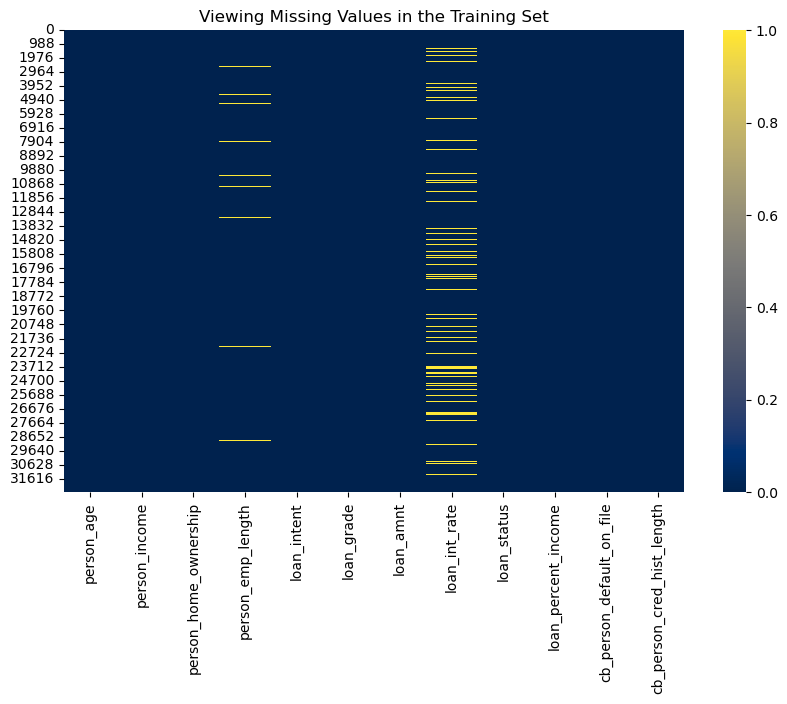

In [22]:
# xem các giá trị null trên tập dữ liệu
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=True, cmap="cividis")
plt.title("Viewing Missing Values in the Training Set")
plt.show()

In [24]:
# loại bỏ giá trị null
df = df.dropna(subset=['person_emp_length', 'loan_int_rate'])
print(df.isnull().sum())

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64


In [26]:
df.shape

(28638, 12)

### 2.2. Duplicate Rows

In [33]:
df.duplicated().sum()

137

In [35]:
# loại bỏ các duplicate data
df.drop_duplicates(inplace=True)
df.shape

(28501, 12)

### 2.3. Handling Outliers

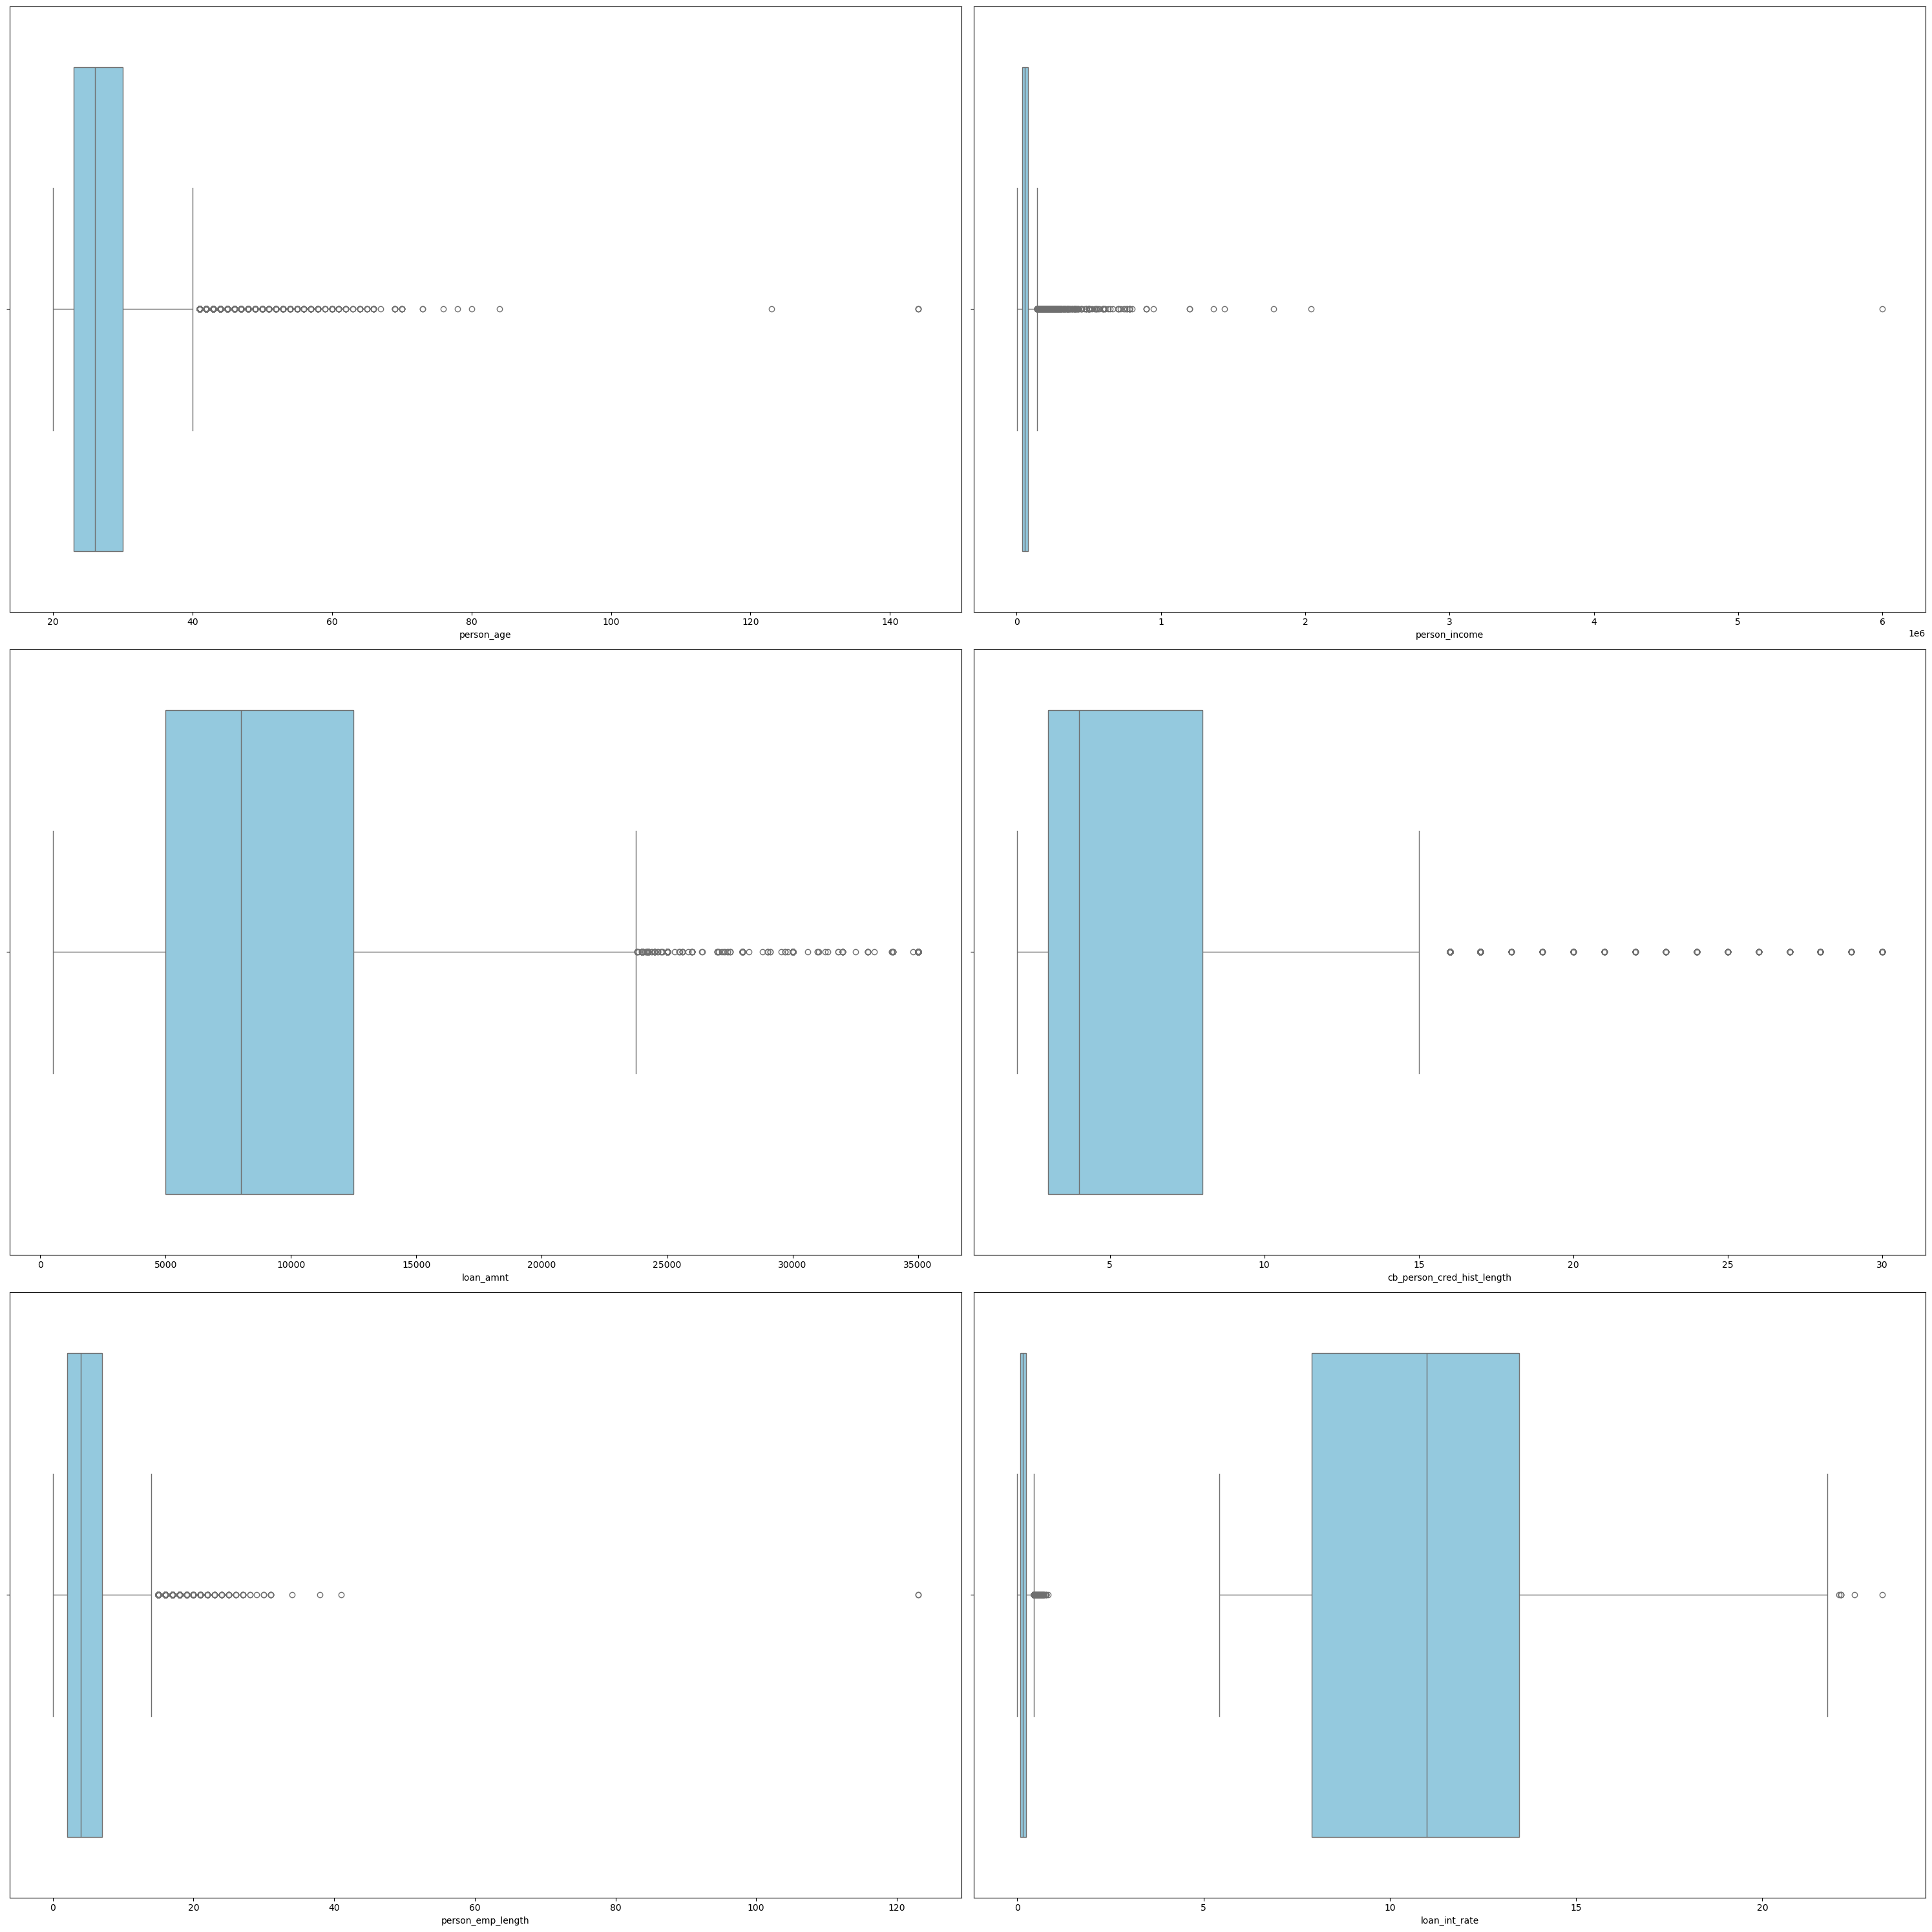

In [38]:
color = 'skyblue'
fig,axes = plt.subplots(3, 2, figsize=(30, 30))
sns.boxplot(x = "person_age", data = df, ax = axes[0,0], color=color)
sns.boxplot(x = "person_income", data = df, ax = axes[0,1], color=color)
sns.boxplot(x = "loan_amnt", data = df, ax = axes[1,0], color=color)
sns.boxplot(x = "cb_person_cred_hist_length", data = df, ax = axes[1,1], color=color)
sns.boxplot(x = "person_emp_length", data = df, ax = axes[2,0], color=color)
sns.boxplot(x = "loan_int_rate", data = df, ax = axes[2,1], color=color)
sns.boxplot(x = "loan_percent_income", data = df, ax = axes[2,1], color=color)

plt.tight_layout()
plt.show()

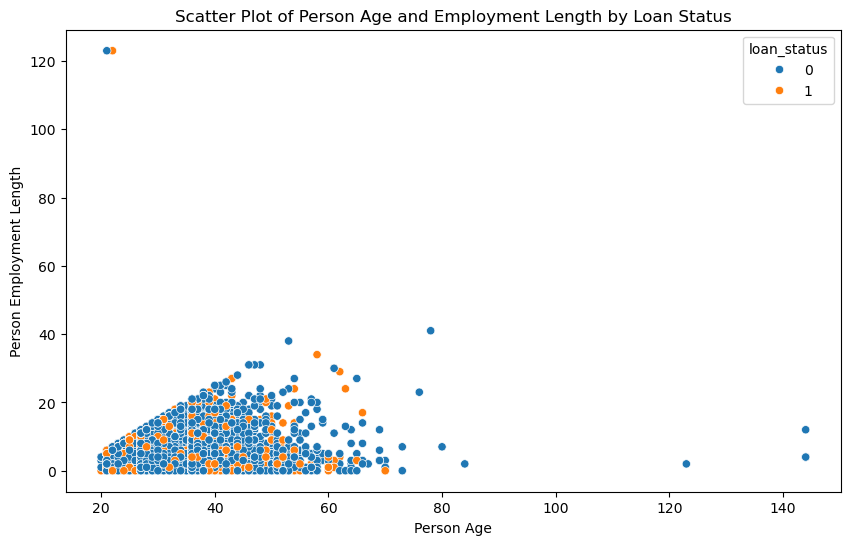

In [40]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='person_age', y='person_emp_length', hue='loan_status', data=df)
plt.title('Scatter Plot of Person Age and Employment Length by Loan Status')
plt.xlabel('Person Age')
plt.ylabel('Person Employment Length')
plt.show()

In [42]:
outlier_age= df[df["person_age"] > 80].shape[0]
outlier_age

5

In [44]:
# loại bỏ các hàng có tuổi > 80
df = df[df["person_age"] < 80]
df.shape

(28495, 12)

In [46]:
outliers_emp_length = df[df['person_emp_length'] > 80].shape[0]
outliers_emp_length

2

In [48]:
# loại bỏ các hàng có person_emp_length > 80
df = df[df['person_emp_length'] < 80]
df.shape

(28493, 12)

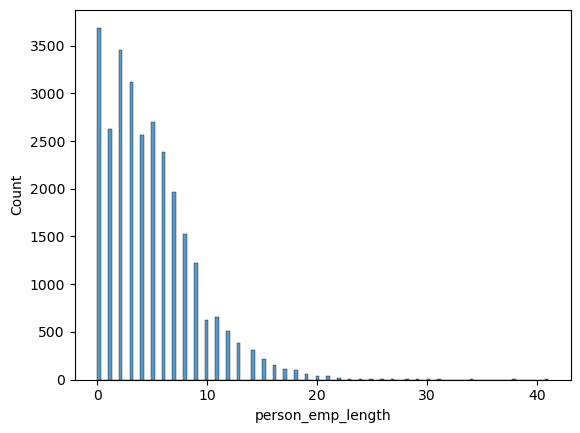

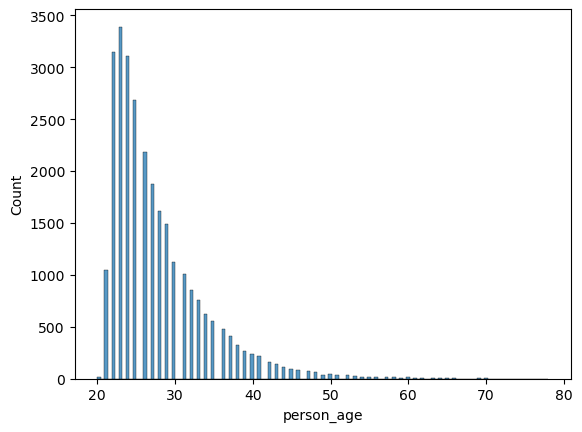

In [50]:
# kiểm tra lại phân bố dữ liệu của 2 features : person_emp_length & person_age
sns.histplot(data= df, x='person_emp_length')
plt.show()

sns.histplot(data= df, x='person_age')
plt.show()

# Khám phá dữ liệu

## 1.Biến mục tiêu


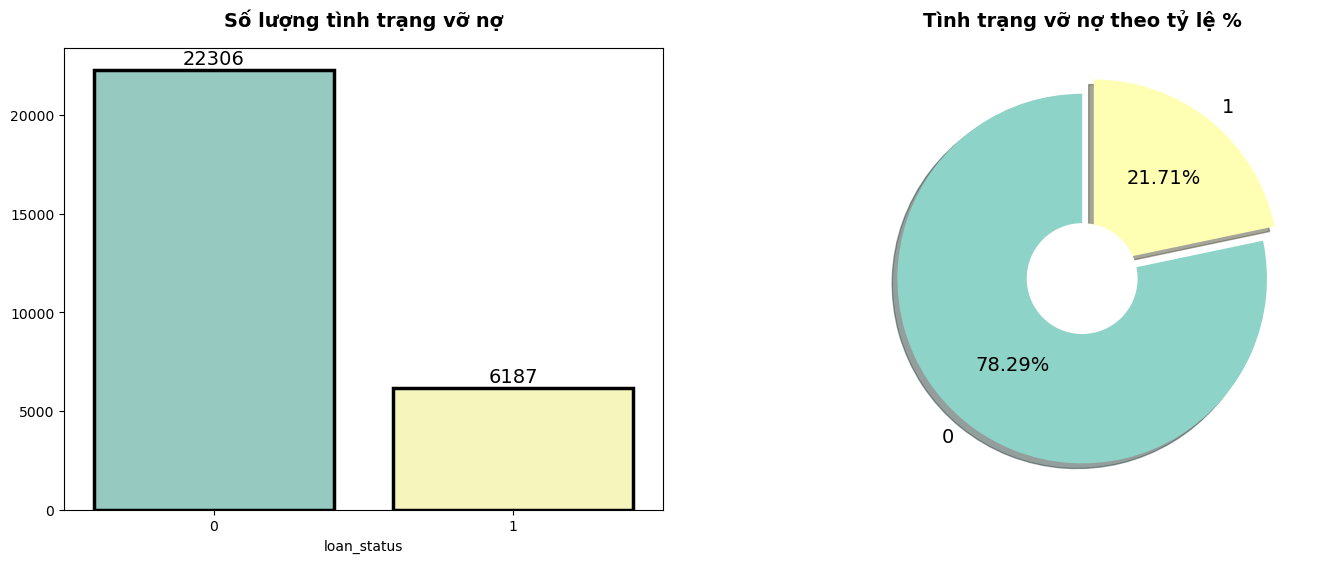

In [55]:
plt.figure(figsize=(17,6))
plt.subplot(1,2,1)
loan_status = df["loan_status"].value_counts()
sns.barplot(x=loan_status.index,y=loan_status.values,edgecolor='black',linewidth=2.5,palette= 'Set3')
plt.title("Số lượng tình trạng vỡ nợ",fontweight="black", size=14, pad=15)
for i, v in enumerate(loan_status.values):
    plt.text(i, v+250, v,ha="center", fontsize=14)

# Hiển thị loan status theo tỷ lệ phần trăm
plt.subplot(1,2,2)
colors = sns.color_palette('Set3', len(loan_status))
plt.pie(loan_status, labels=["0","1"], autopct="%.2f%%",shadow=True,textprops={"size":14},
        colors = colors,explode=[0,0.1],startangle=90)
center_circle = plt.Circle((0, 0), 0.3, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)
plt.title("Tình trạng vỡ nợ theo tỷ lệ %",fontweight="black",size=14 ,pad=15)
plt.show()

## 2.Biến định lượng



In [59]:
def plot_distribution(df, col, bins=30):
    sns.set(style="whitegrid")
    sns.histplot(df[col], bins=bins, kde=True)
    plt.title(f'Phân phối của {col}')
    plt.xlabel(col)
    plt.ylabel('Số lượng')

    ax = plt.gca()
    kde_line = ax.lines[-1]
    kde_line.set_color("orange")

    plt.show()

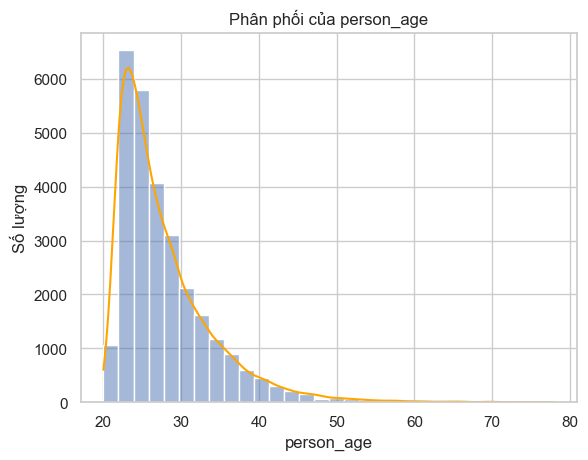

In [61]:
plot_distribution(df, 'person_age')

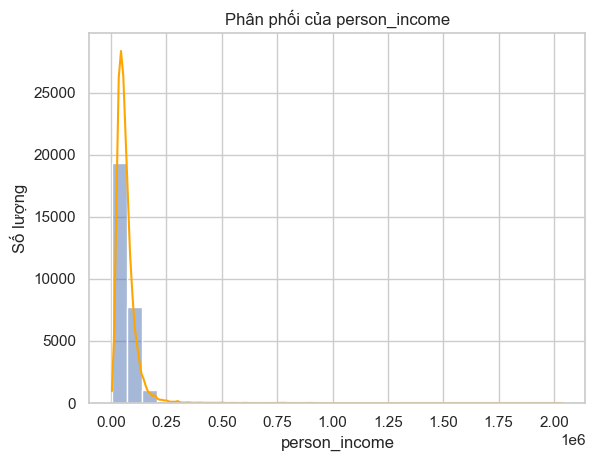

In [63]:
plot_distribution(df, 'person_income')

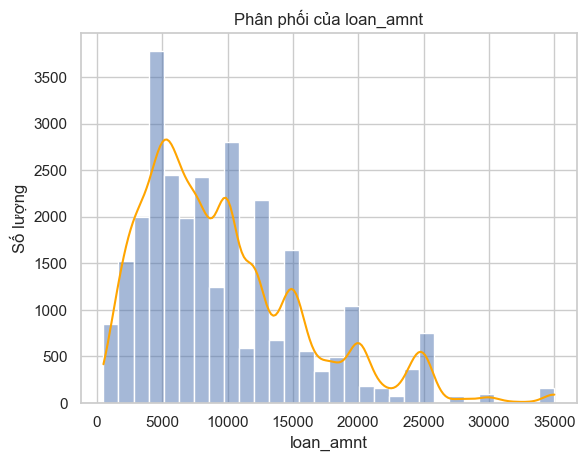

In [65]:
plot_distribution(df, 'loan_amnt')

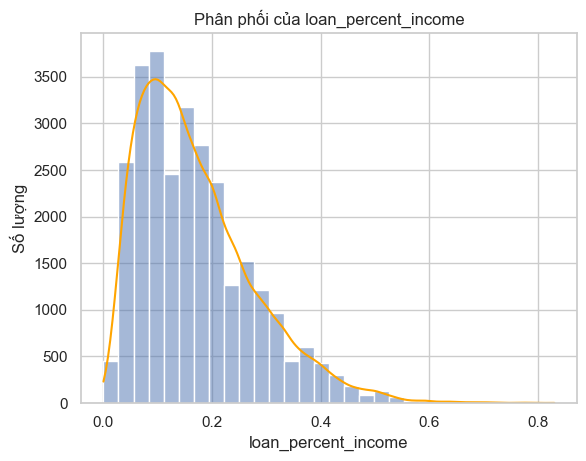

In [67]:
plot_distribution(df, 'loan_percent_income')

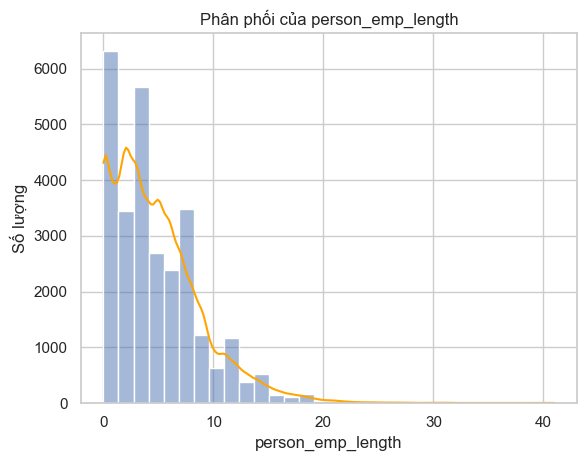

In [69]:
plot_distribution(df, 'person_emp_length')

## 3. Tìm hiểu mức độ ảnh hưởng của các biến phân loại đối với rủi ro tín dụng

In [74]:
# viết hàm để phân tích các trường dữ liệu phân loại
def plot_loan_categorical(df, categorical_col):
    plt.figure(figsize=(20, 8))
    # biểu đồ cột
    plt.subplot(1, 2, 1)
    sns.countplot(x=categorical_col, hue='loan_status', data=df, palette=['skyblue', 'salmon'],)
    plt.title(f'Khả năng vỡ nợ dựa trên {categorical_col.replace("_", " ").title()}')
    plt.xlabel(categorical_col.replace("_", " ").title())
    plt.ylabel('Số lượng')
    plt.legend(title='Khả năng',labels=['Không vỡ nợ','Vỡ nợ'], loc='upper right')
    plt.xticks(rotation=45, ha='right')
    # biểu đồ tròn
    plt.subplot(1, 2, 2)
    category_counts = df[categorical_col].value_counts()
    explode = [0.1 if i ==  category_counts.idxmax() else 0 for i in  category_counts.index]
    plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%',
            startangle=90, colors=sns.color_palette("plasma", len(category_counts)), shadow=True,explode=explode,textprops={'fontsize': 10})
    plt.title(f'Thống kê số lượng trên {categorical_col.replace("_", " ").title()} theo tỷ lệ %')

    plt.tight_layout()
    plt.show()
    # bảng hiển thị số và phần trăm của biến phân loại
    category_counts = df[categorical_col].value_counts()
    category_percentages = category_counts / category_counts.sum() * 100
    stats_table = pd.DataFrame({
        'Số lượng': category_counts,
        'Phần trăm': category_percentages.round(2)
    })
    print(f"Bảng số lượng thống kê trên {categorical_col.replace('_', ' ').title()}:")
    print(stats_table)
    print("\n")

### Tình trạng sở hữu nhà của người vay

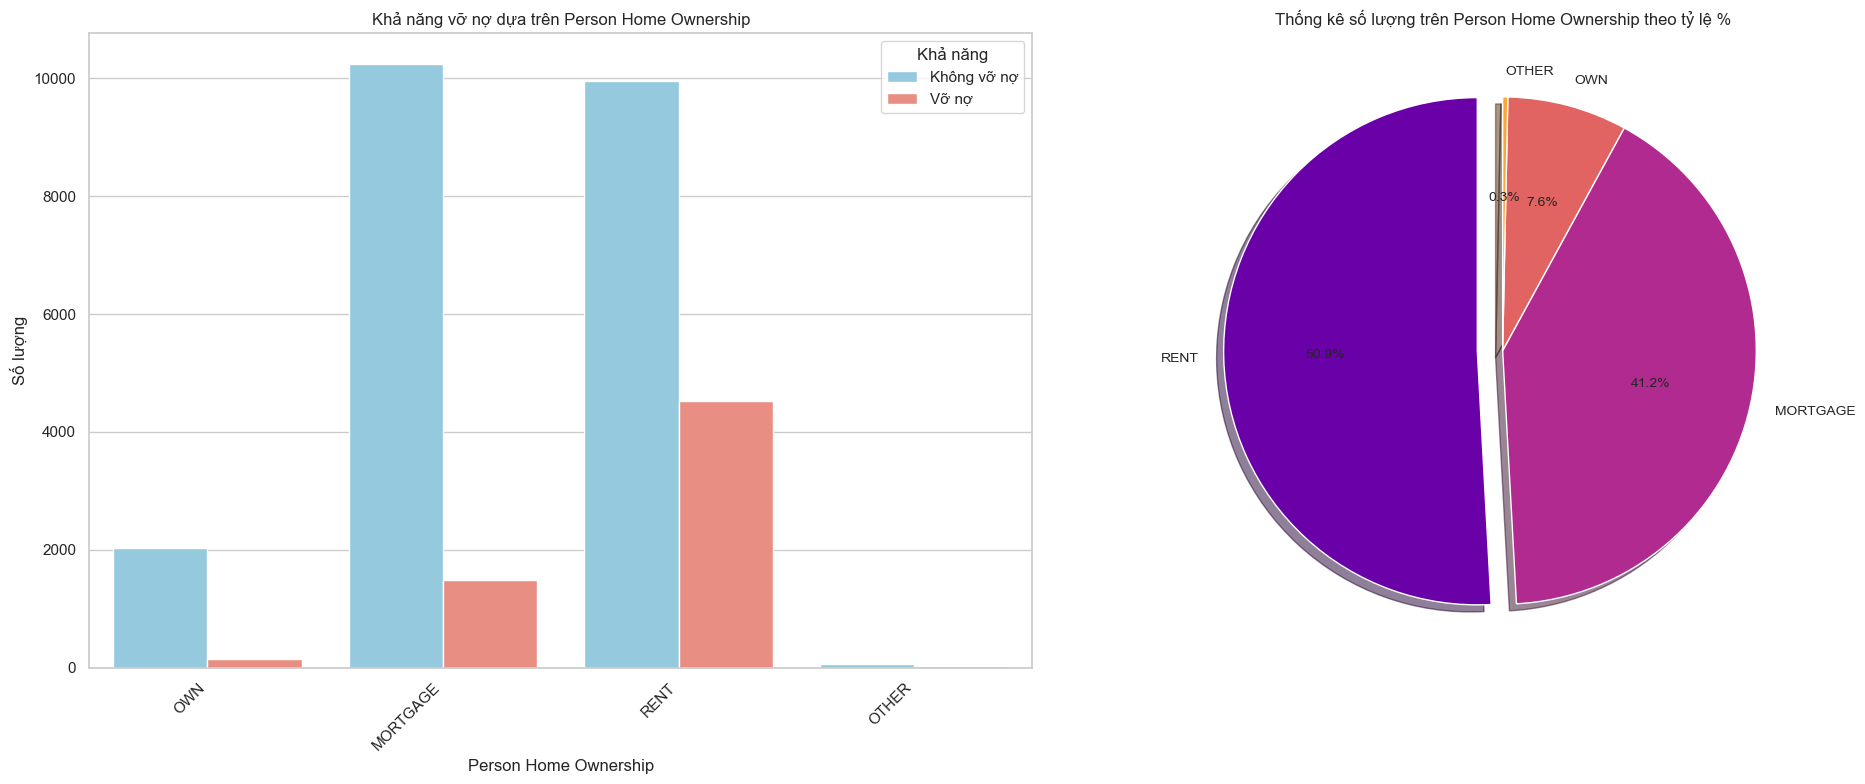

Bảng số lượng thống kê trên Person Home Ownership:
                       Số lượng  Phần trăm
person_home_ownership                     
RENT                      14494      50.87
MORTGAGE                  11732      41.18
OWN                        2174       7.63
OTHER                        93       0.33




In [77]:
plot_loan_categorical(df, 'person_home_ownership')

### Mục đích vay của người vay

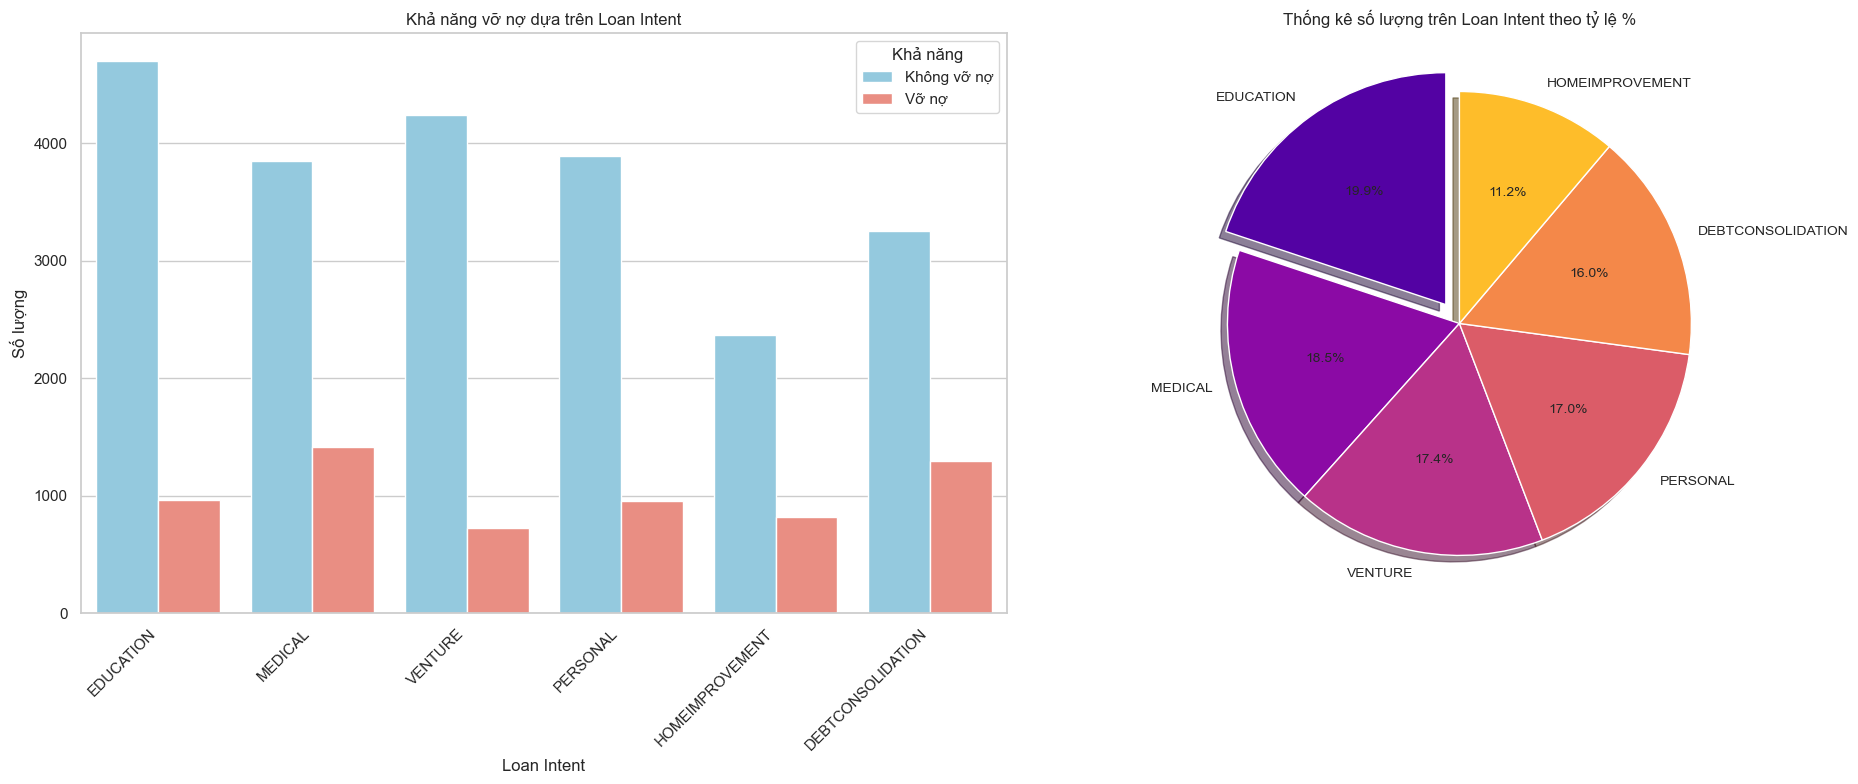

Bảng số lượng thống kê trên Loan Intent:
                   Số lượng  Phần trăm
loan_intent                           
EDUCATION              5668      19.89
MEDICAL                5268      18.49
VENTURE                4967      17.43
PERSONAL               4856      17.04
DEBTCONSOLIDATION      4547      15.96
HOMEIMPROVEMENT        3187      11.19




In [80]:
plot_loan_categorical(df, 'loan_intent')

### Điểm tín dụng đối với các khoản vay

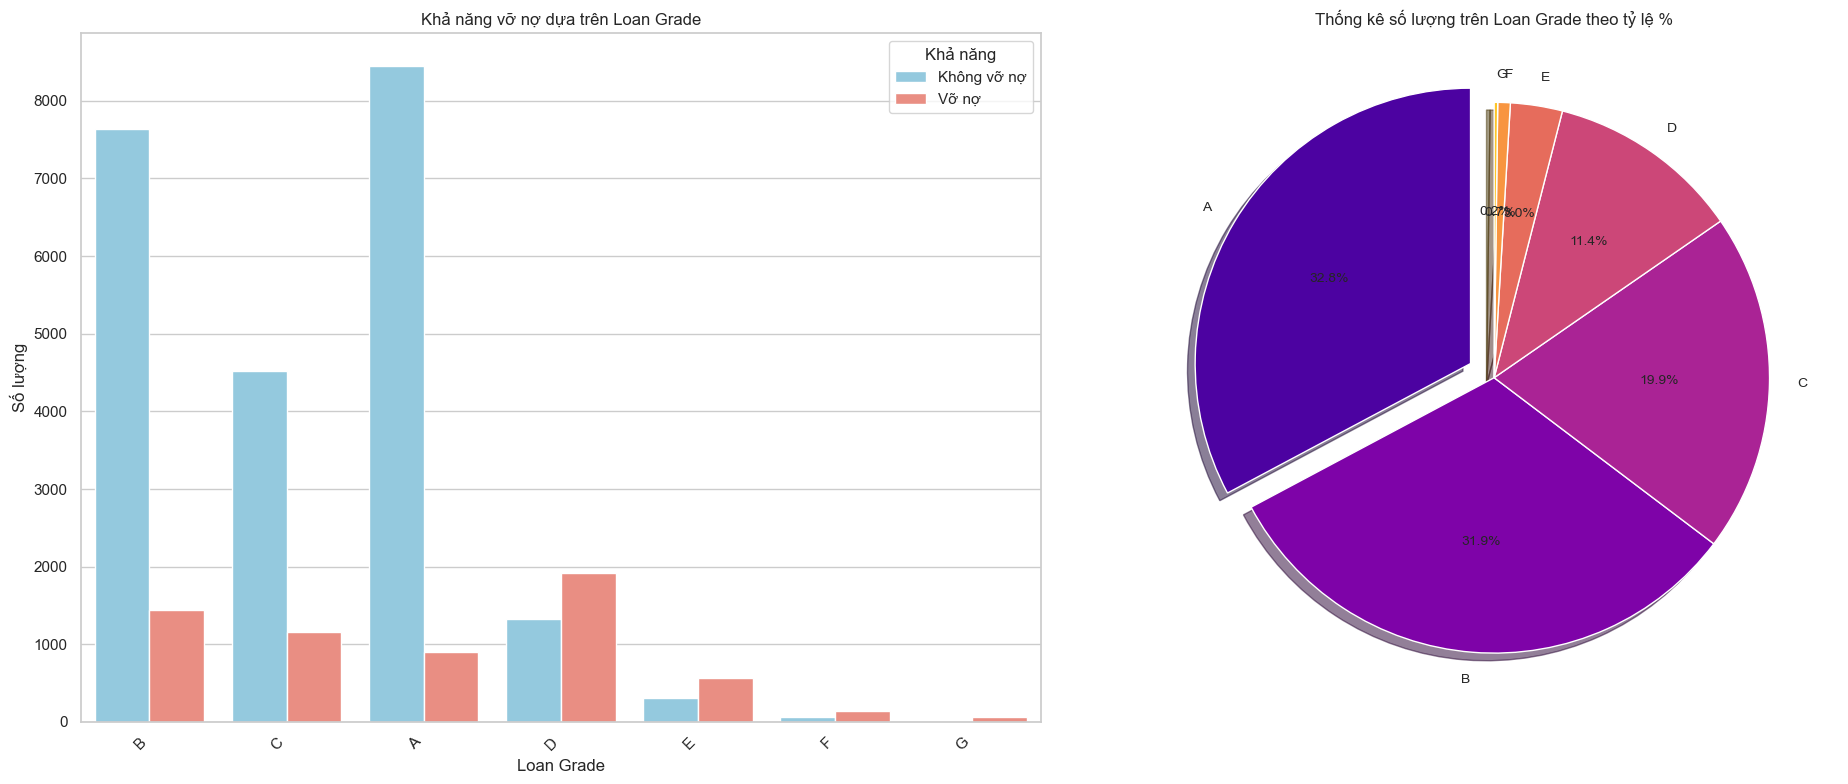

Bảng số lượng thống kê trên Loan Grade:
            Số lượng  Phần trăm
loan_grade                     
A               9343      32.79
B               9091      31.91
C               5680      19.93
D               3242      11.38
E                869       3.05
F                209       0.73
G                 59       0.21




In [85]:
plot_loan_categorical(df, 'loan_grade')

### Lịch sử vỡ nợ của cá nhân theo hồ sơ của cơ quan tín dụng:


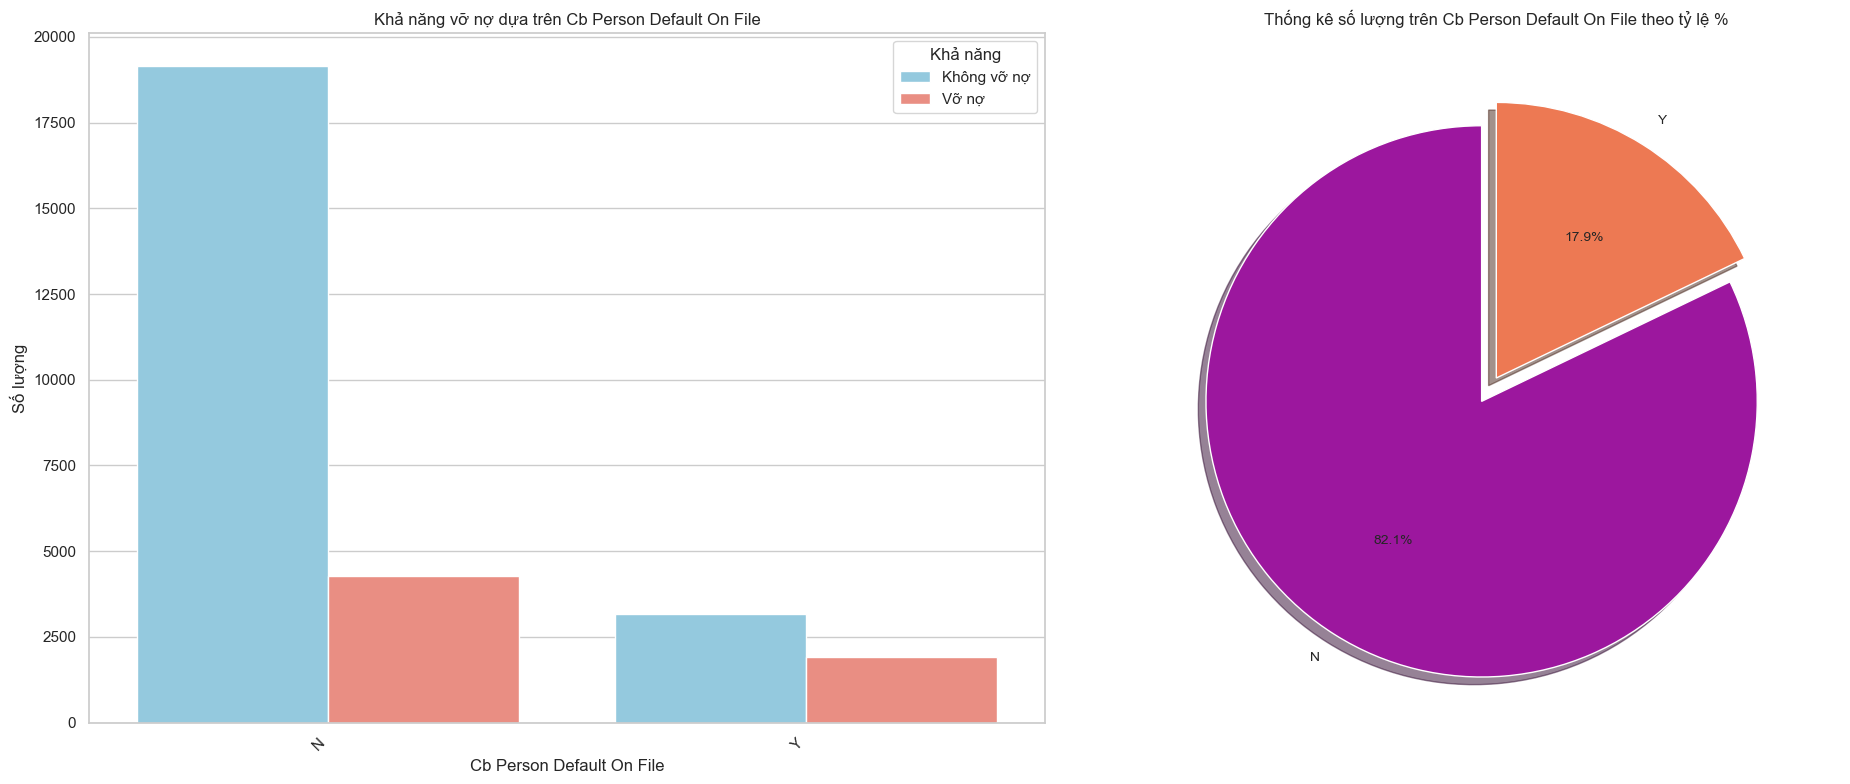

Bảng số lượng thống kê trên Cb Person Default On File:
                           Số lượng  Phần trăm
cb_person_default_on_file                     
N                             23404      82.14
Y                              5089      17.86




In [91]:
plot_loan_categorical(df, 'cb_person_default_on_file')

## 4. Yếu tố cản trở khi xét duyệt khoản vay dựa trên phân tích các biến định lượng
### Tìm  hiểu ở các nhóm tuổi họ thường vay tiền với mục đích gì?

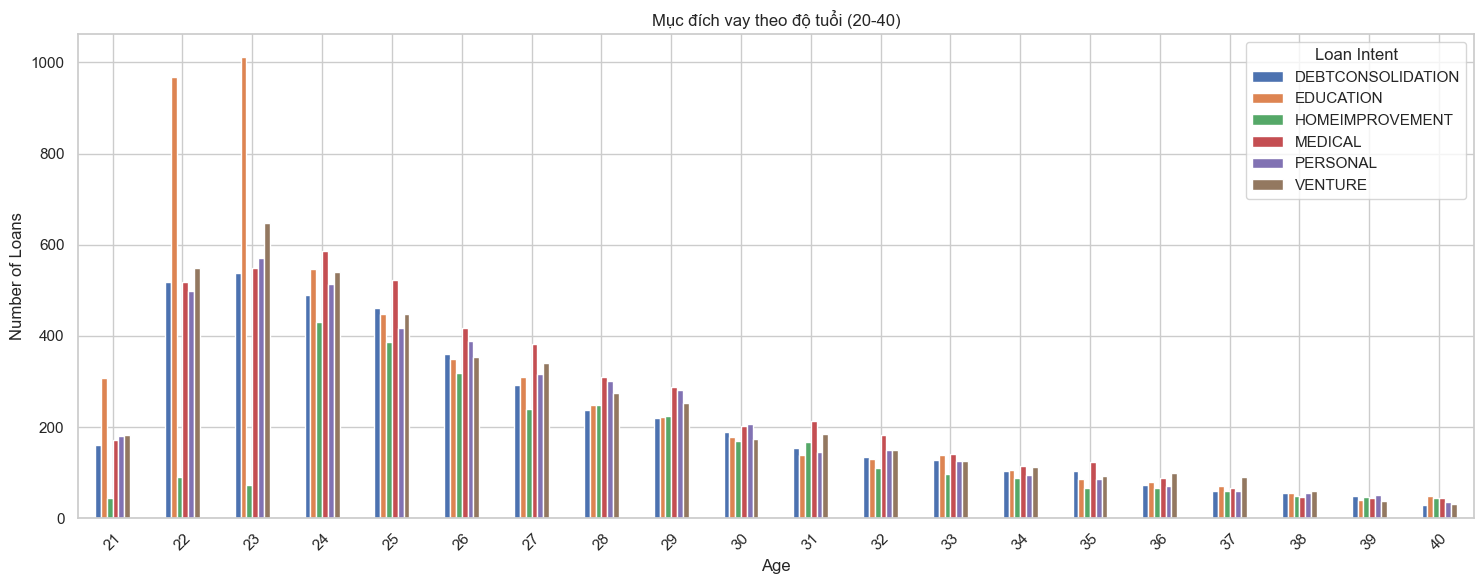

In [94]:
age_range_df = df[(df['person_age'] >= 21) & (df['person_age'] <= 40)]
loan_intent_by_age = age_range_df.groupby(['person_age', 'loan_intent']).size().unstack(fill_value=0)
loan_intent_by_age.plot(kind='bar', figsize=(15, 6))
plt.title('Mục đích vay theo độ tuổi (20-40)')
plt.xlabel('Age')
plt.ylabel('Number of Loans')
plt.xticks(rotation=45)
plt.legend(title='Loan Intent')
plt.tight_layout()
plt.show()



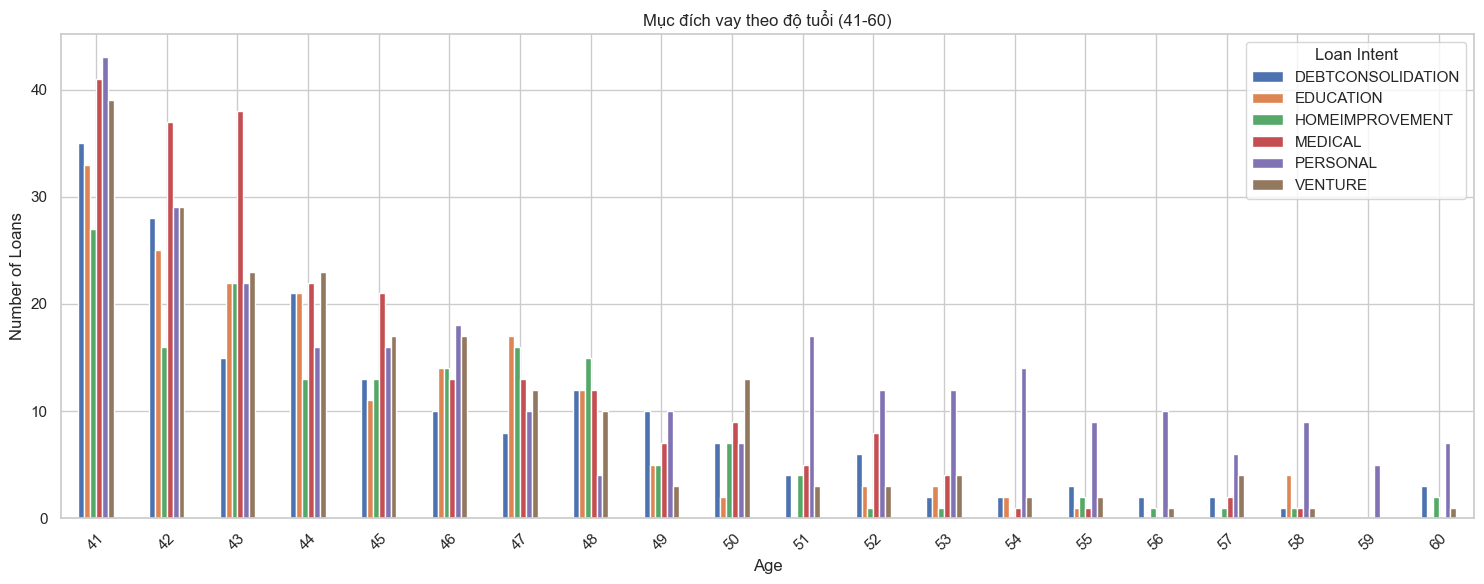

In [96]:
age_range_df = df[(df['person_age'] >= 41) & (df['person_age'] <= 60)]
loan_intent_by_age = age_range_df.groupby(['person_age', 'loan_intent']).size().unstack(fill_value=0)
loan_intent_by_age.plot(kind='bar', figsize=(15, 6))
plt.title('Mục đích vay theo độ tuổi (41-60)')
plt.xlabel('Age')
plt.ylabel('Number of Loans')
plt.xticks(rotation=45)
plt.legend(title='Loan Intent')
plt.tight_layout()
plt.show()

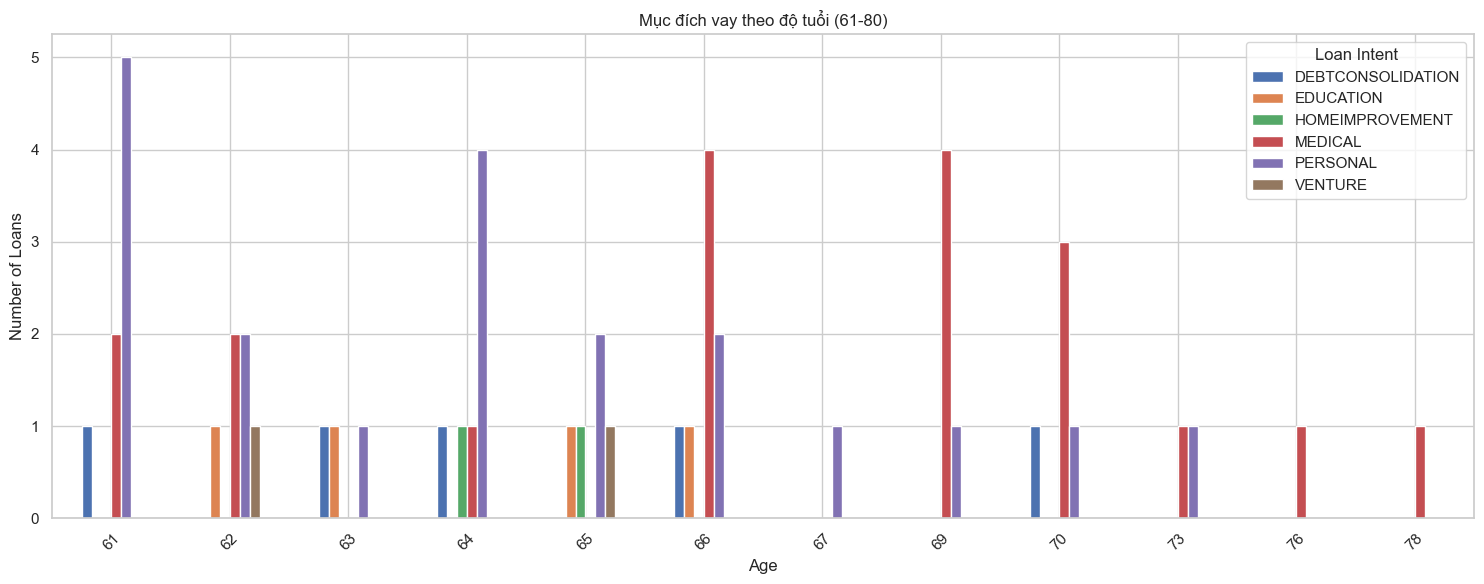

In [98]:
age_range_df = df[(df['person_age'] >= 61) & (df['person_age'] <= 80)]
loan_intent_by_age = age_range_df.groupby(['person_age', 'loan_intent']).size().unstack(fill_value=0)
loan_intent_by_age.plot(kind='bar', figsize=(15, 6))
plt.title('Mục đích vay theo độ tuổi (61-80)')
plt.xlabel('Age')
plt.ylabel('Number of Loans')
plt.xticks(rotation=45)
plt.legend(title='Loan Intent')
plt.tight_layout()
plt.show()


### Số năm người vay đang làm việc

#### Độ dài năm làm việc có ảnh hưởng đến xu hướng gây ra vỡ nợ hay không?

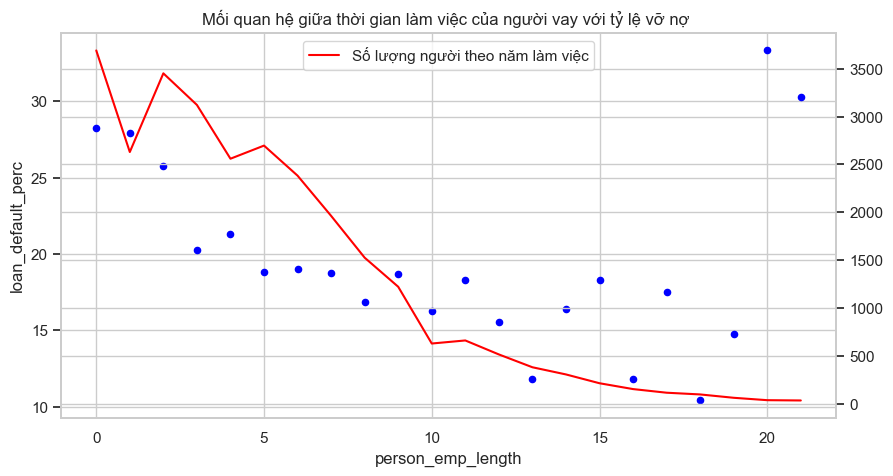

In [101]:
df_emp_length = df.groupby('person_emp_length', as_index=False)['loan_status'].sum().merge(df.groupby('person_emp_length', as_index=False).size()) # nhóm theo thời gian làm việc, tính tổng số khoản vay bị vỡ nợ và tính số lượng khách hàng theo từng nhóm thời gian làm việc
df_emp_length['loan_default_perc'] = df_emp_length['loan_status'] / df_emp_length['size']*100 # tính tỷ lệ phần trăm vỡ nợ cho mỗi nhóm dựa trên số lượng bị vỡ nợ và tổng số khách hàng trong nhóm
df_emp_length = df_emp_length[df_emp_length['size']>30] # loại bỏ các nhóm có số lượng khách hàng nhỏ, đảm bảo kết quả phân tích có độ tin cậy cao hơn
fig, ax = plt.subplots(figsize = (10, 5))
df_emp_length.plot.scatter(x = 'person_emp_length', y='loan_default_perc', ax = ax, c = 'blue')
ax1 = plt.twinx()
df_emp_length.plot.line(x = 'person_emp_length', y='size', ax = ax1, c = 'red')

plt.legend(labels=['Số lượng người theo năm làm việc'],loc='upper center')
plt.title('Mối quan hệ giữa thời gian làm việc của người vay với tỷ lệ vỡ nợ ')
plt.show()

### Số tiền vay
#### Khoảng tiền cho người vay ở mức phù hợp nào để cho việc phê duyệt khoản vay không xảy ra tình trạng vỡ nợ?

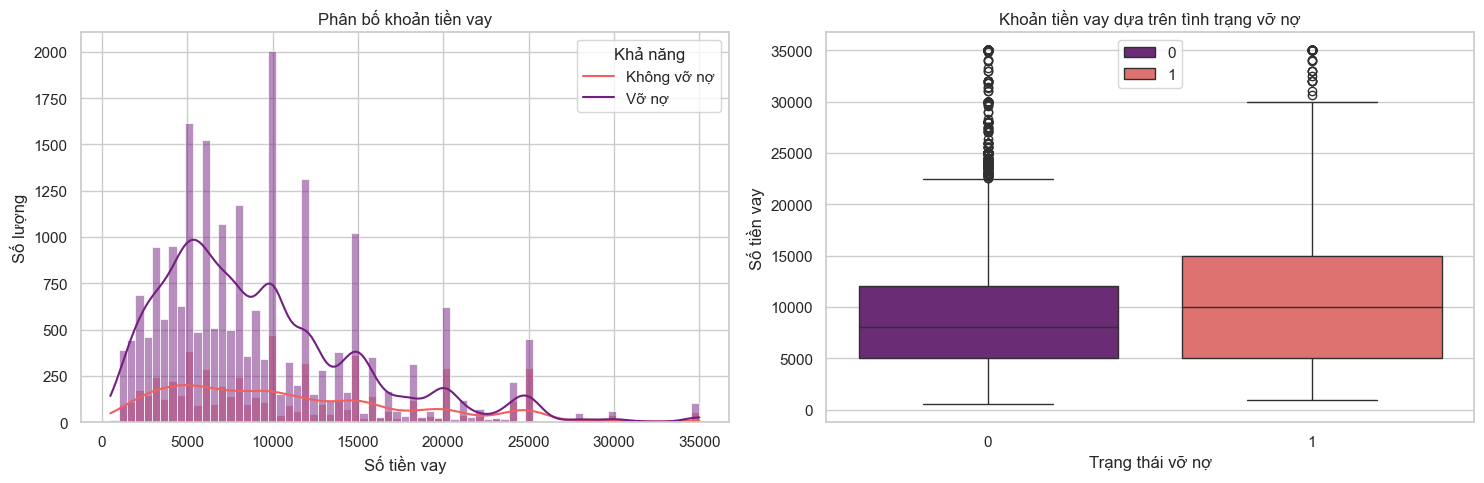

In [104]:
# hisplot
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.title('Phân bố khoản tiền vay')
sns.histplot(data=df, x='loan_amnt', hue='loan_status', kde=True,palette='magma')
plt.xlabel('Số tiền vay')
plt.ylabel('Số lượng')
plt.legend(title='Khả năng',labels=['Không vỡ nợ','Vỡ nợ'], loc='upper right')

# boxplot
plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='loan_status', y='loan_amnt', hue='loan_status',palette='magma')
plt.title('Khoản tiền vay dựa trên tình trạng vỡ nợ')
plt.xlabel('Trạng thái vỡ nợ')
plt.ylabel('Số tiền vay')
plt.legend( loc='upper center')

plt.tight_layout()
plt.show()

#### Xu hướng vay tiền của người vay có là yếu tố giúp cho việc ra quyết định dễ dàng hơn trong việc xét duyệt khoản vay hay không?

### Lãi suất khoản vay

#### Ở mức lãi suất nào là phù hợp cho việc phê duyệt khoản vay mà không xảy ra tình trạng vỡ nợ?

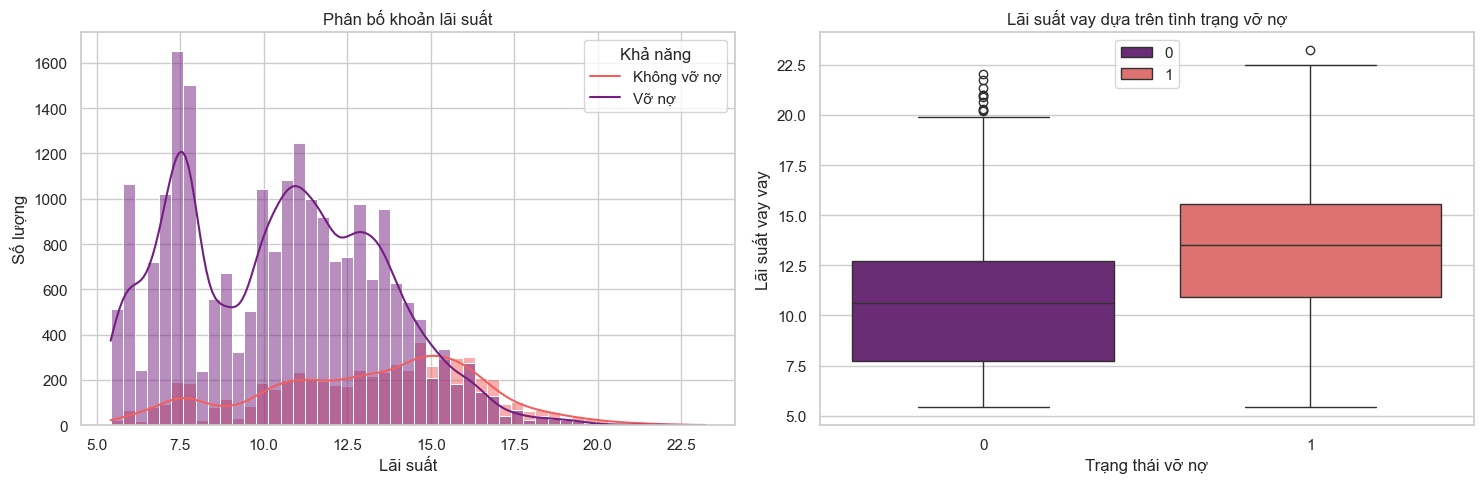

In [111]:
# hisplot
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.title('Phân bố khoản lãi suất')
sns.histplot(data=df, x='loan_int_rate', hue='loan_status', kde=True,palette='magma')
plt.xlabel('Lãi suất')
plt.ylabel('Số lượng')
plt.legend(title='Khả năng',labels=['Không vỡ nợ','Vỡ nợ'], loc='upper right')

# boxplot
plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='loan_status', y='loan_int_rate', hue='loan_status',palette='magma')
plt.title('Lãi suất vay dựa trên tình trạng vỡ nợ')
plt.xlabel('Trạng thái vỡ nợ')
plt.ylabel('Lãi suất vay vay')
plt.legend( loc='upper center')

plt.tight_layout()
plt.show()

### Thu nhập của người vay

#### Tìm hiểu mối liên hệ giữa thu nhập và mức tiền vay có ảnh hưởng như thế nào đến rủi ro vỡ nợ?

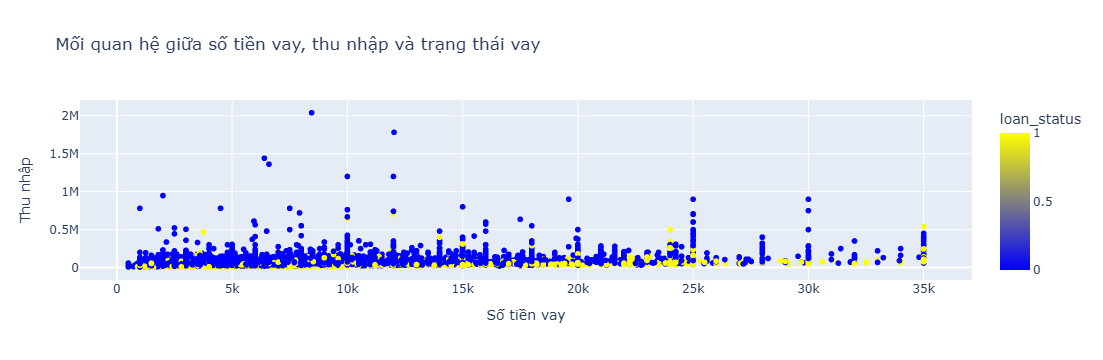

In [114]:
fig = px.scatter(
    df,
    x="loan_amnt",
    y="person_income",
    color="loan_status",
    color_continuous_scale=["blue", "yellow"],
    title="Mối quan hệ giữa số tiền vay, thu nhập và trạng thái vay",
    labels={"loan_amnt": "Số tiền vay", "person_income": "Thu nhập"},
)
fig.show()


## 5. Ma trận tương quan

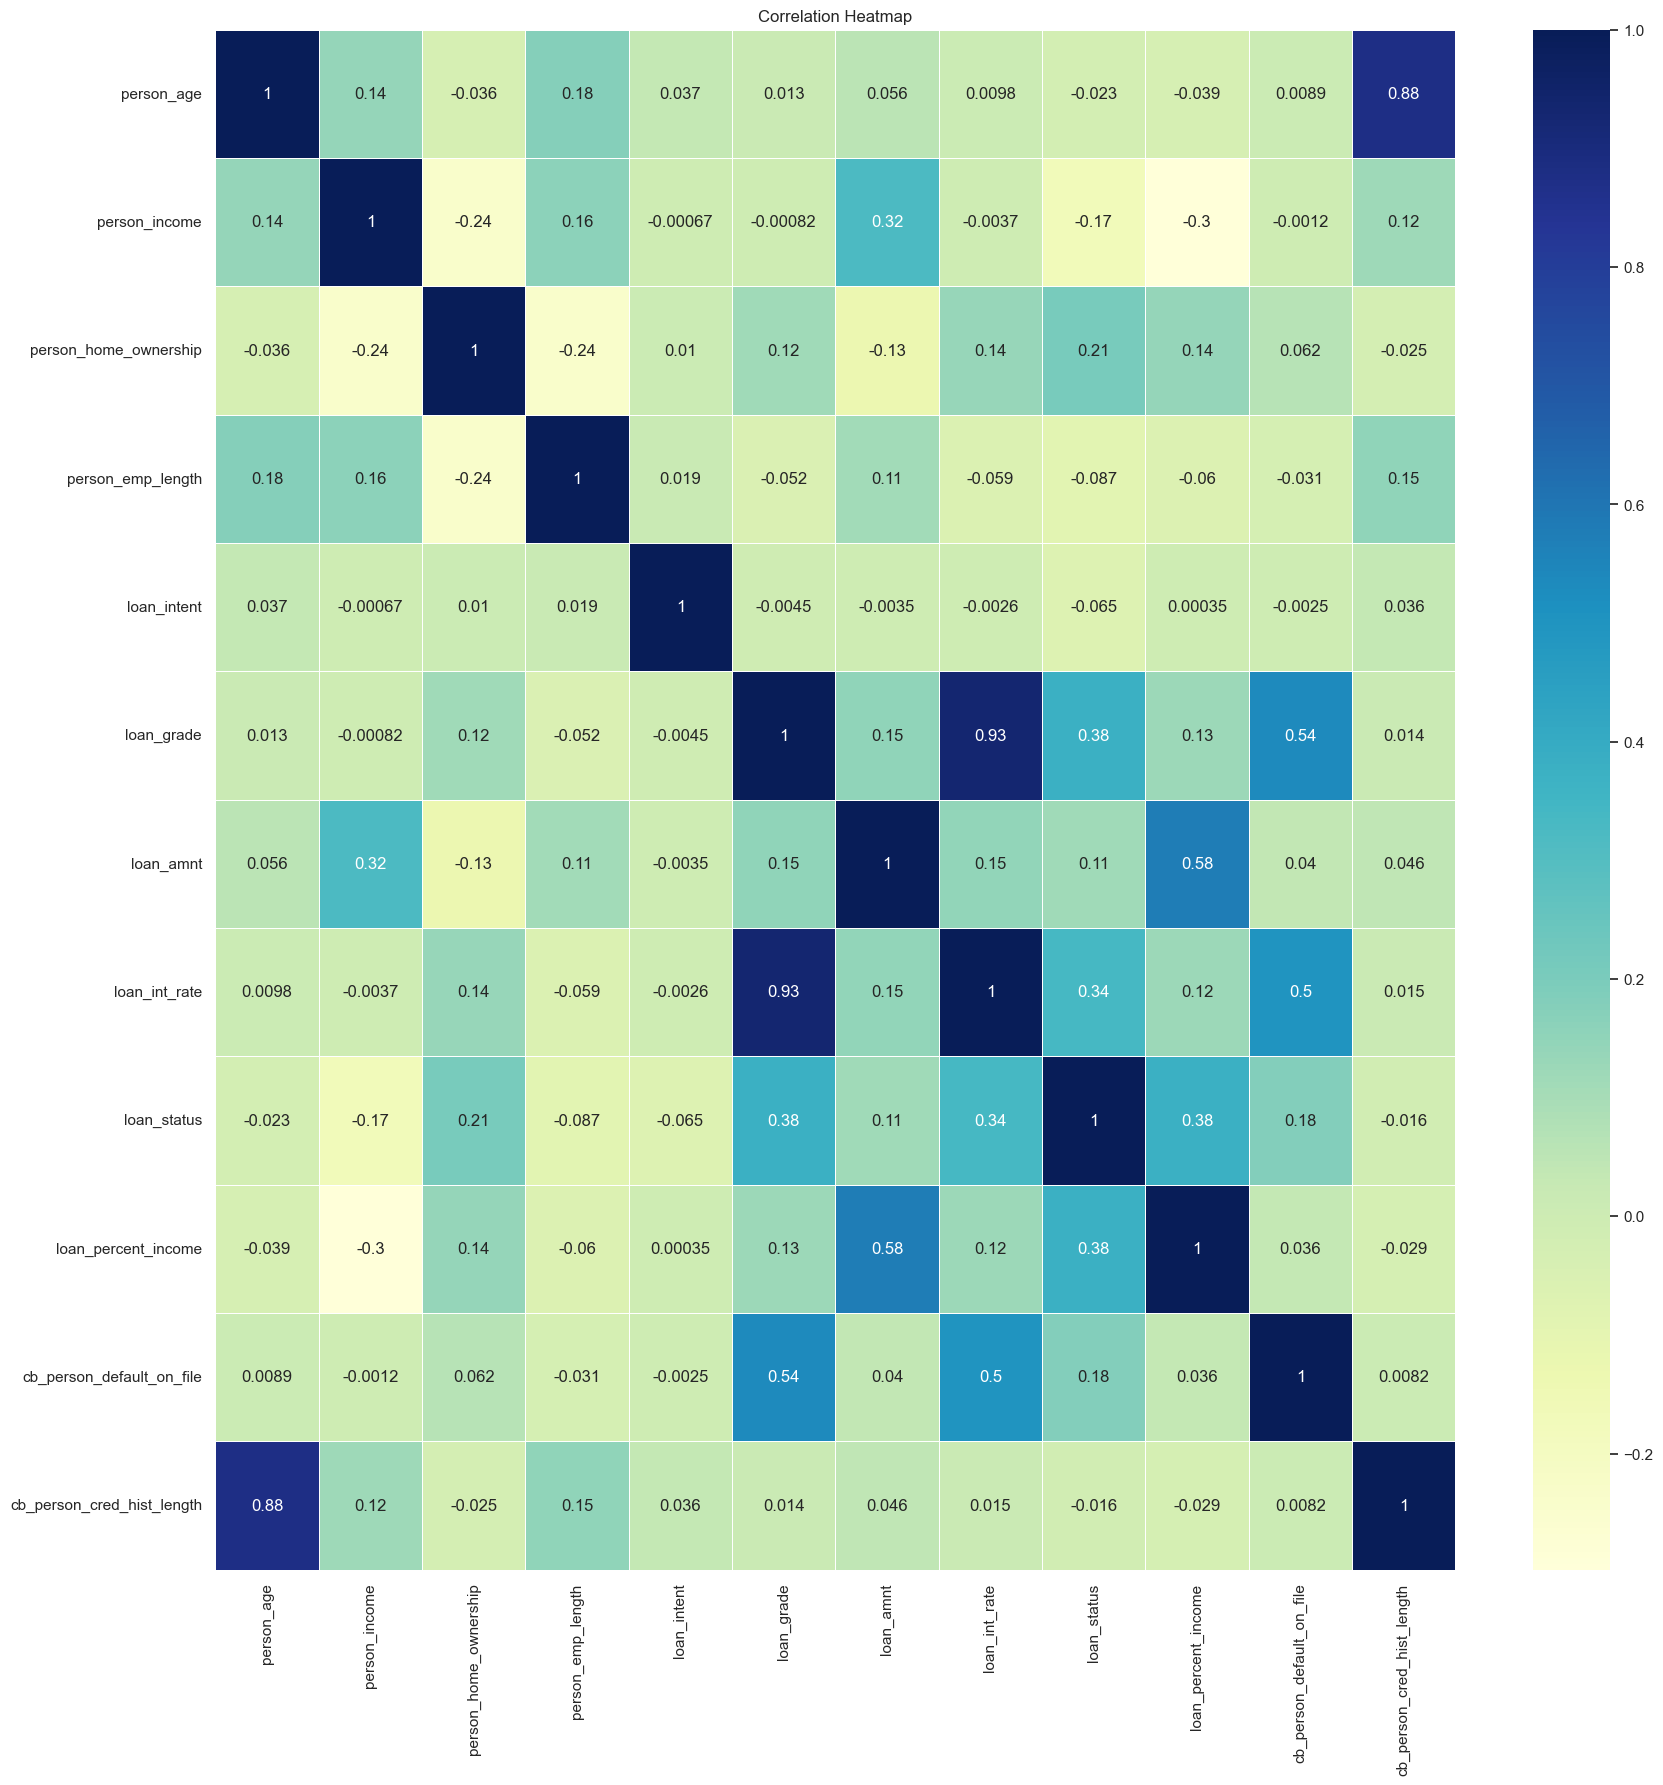

In [117]:
credit_risk_encoded = df.copy()
label_encoder = LabelEncoder()
for column in credit_risk_encoded.select_dtypes(include=['object', 'category']).columns:
    credit_risk_encoded[column] = label_encoder.fit_transform(credit_risk_encoded[column])

correlation_matrix = credit_risk_encoded.corr()

plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


# Data Transformation

## 1. Chuyển dữ liệu 'object' thành dữ liệu 'numeric'

In [123]:
# OneHot encoding categorical variables
num_col = df.select_dtypes(exclude = 'object')
char_col = df.select_dtypes(include = 'object')

encoded_char_col = pd.get_dummies(char_col)

df = pd.concat([num_col, encoded_char_col], axis=1)
df.head()

person_age  person_income  person_emp_length  loan_amnt  loan_int_rate  \
1          21           9600                5.0       1000          11.14   
2          25           9600                1.0       5500          12.87   
3          23          65500                4.0      35000          15.23   
4          24          54400                8.0      35000          14.27   
5          21           9900                2.0       2500           7.14   

   loan_status  loan_percent_income  cb_person_cred_hist_length  \
1            0                 0.10                           2   
2            1                 0.57                           3   
3            1                 0.53                           2   
4            1                 0.55                           4   
5            1                 0.25                           2   

   person_home_ownership_MORTGAGE  person_home_ownership_OTHER  ...  \
1                           False                        False  ...   
2                            True                        False  ...   
3                           False                        False  ...   
4                           False                        False  ...   
5                           False                        False  ...   

   loan_intent_VENTURE  loan_grade_A  loan_grade_B  loan_grade_C  \
1                False         False          True         False   
2                False         False         False          True   
3                False         False         False          True   
4                False         False         False          True   
5                 True          True         False         False   

   loan_grade_D  loan_grade_E  loan_grade_F  loan_grade_G  \
1         False         False         False         False   
2         False         False         False         False   
3         False         False         False         False   
4         False         False         False         False   
5         False         False         False         False   

   cb_person_default_on_file_N  cb_person_default_on_file_Y  
1                         True                        False  
2                         True                        False  
3                         True                        False  
4                        False                         True  
5                         True                        False  

[5 rows x 27 columns]

## 1. Dùng Over-Sampling Xử Lý Dữ Liệu Mất Cân Bằng

In [126]:
# Using SMOTE method to over sample the data
sm = SMOTE()

dataset_dummy = pd.get_dummies(df, drop_first=True)

X = dataset_dummy.drop(["loan_status"],axis=1)
y = dataset_dummy['loan_status']

X_sm, y_sm = sm.fit_resample(X, y)
X_sm.shape, y_sm.shape

((44612, 26), (44612,))

In [128]:
x, y = df.drop('loan_status', axis=1), df['loan_status']
x.shape, y.shape

((28493, 26), (28493,))

In [130]:
smote = SMOTE(sampling_strategy='minority')
x, y = smote.fit_resample(x,y)
y.value_counts()

loan_status
0    22306
1    22306
Name: count, dtype: int64

## 2. Phân chia dữ liệu và huấn luyện mô hình

In [133]:
X = df.drop('loan_status', axis=1)
y = df['loan_status']

In [135]:

# split train and test sets
X_train, X_test, y_train, y_test = train_test_split(
                                            df.drop(labels=['loan_status'], axis=1),
                                            df['loan_status'],
                                            test_size=0.3,
                                            random_state=0)

In [137]:
X_train.shape, X_test.shape

((19945, 26), (8548, 26))

In [139]:
y_train.shape, y_test.shape


((19945,), (8548,))

# Xây Dựng Mô Hình

In [142]:
def Visualize_confusion_matrix(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(7, 5))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues',
                xticklabels=['0','1'], yticklabels=['0','1'])
    plt.title('Độ chính xác: {0:.4f}'.format(accuracy_score(y_test, y_pred)))
    plt.ylabel('Giá trị đúng')
    plt.xlabel('Giá trị dự đoán')
    plt.show()

    print("\n")
    print("Báo cáo phân loại: ")
    print(classification_report(y_test, y_pred))
    return

## 1. CatBoost

##### CatBoost (Categorical Boosting) là một thuật toán học máy mạnh mẽ, đặc biệt hiệu quả trong việc xử lý dữ liệu phân loại mà không cần tiền xử lý phức tạp. Dựa trên phương pháp gradient boosting, CatBoost tự động xử lý các tính năng phân loại mà không cần phải chuyển đổi chúng thành dạng số. Nó giúp cải thiện độ chính xác mô hình, tránh overfitting và tăng tốc quá trình huấn luyện.

### Huấn luyện mô hình

In [147]:
CB_model = CatBoostClassifier(random_seed = 42)

CB_model.fit(X_train, y_train,
          eval_set=(X_test, y_test),
          verbose=True)
y_pred = CB_model.predict(X_test)

acc1 = accuracy_score(y_test, y_pred)

Learning rate set to 0.066369
0:	learn: 0.6264023	test: 0.6261443	best: 0.6261443 (0)	total: 179ms	remaining: 2m 59s
1:	learn: 0.5755719	test: 0.5743796	best: 0.5743796 (1)	total: 189ms	remaining: 1m 34s
2:	learn: 0.5342748	test: 0.5322023	best: 0.5322023 (2)	total: 200ms	remaining: 1m 6s
3:	learn: 0.4990921	test: 0.4967464	best: 0.4967464 (3)	total: 210ms	remaining: 52.2s
4:	learn: 0.4622569	test: 0.4595978	best: 0.4595978 (4)	total: 220ms	remaining: 43.8s
5:	learn: 0.4332551	test: 0.4301624	best: 0.4301624 (5)	total: 227ms	remaining: 37.5s
6:	learn: 0.4096693	test: 0.4059221	best: 0.4059221 (6)	total: 234ms	remaining: 33.2s
7:	learn: 0.3906469	test: 0.3863392	best: 0.3863392 (7)	total: 240ms	remaining: 29.8s
8:	learn: 0.3728307	test: 0.3680844	best: 0.3680844 (8)	total: 246ms	remaining: 27.1s
9:	learn: 0.3574806	test: 0.3524504	best: 0.3524504 (9)	total: 254ms	remaining: 25.1s
10:	learn: 0.3465497	test: 0.3409098	best: 0.3409098 (10)	total: 259ms	remaining: 23.3s
11:	learn: 0.3343602

In [149]:
# Train Score
train_score = CB_model.score(X_train, y_train)
print('Training Score: %0.4f'% train_score)

Training Score: 0.9557


### Kiểm Thử Mô Hình

In [152]:
# Test score
print('Catboost_model: Recall: %0.4f'% recall_score(y_test, y_pred))
print('Catboost_model: Precision: %0.4f'% precision_score(y_test, y_pred))
print('catboost_model: F1 Score: %0.4f'% f1_score(y_test, y_pred))
print('Catboost_model: Accuracy: %0.4f'% accuracy_score(y_test, y_pred))

Catboost_model: Recall: 0.7402
Catboost_model: Precision: 0.9612
catboost_model: F1 Score: 0.8364
Catboost_model: Accuracy: 0.9387


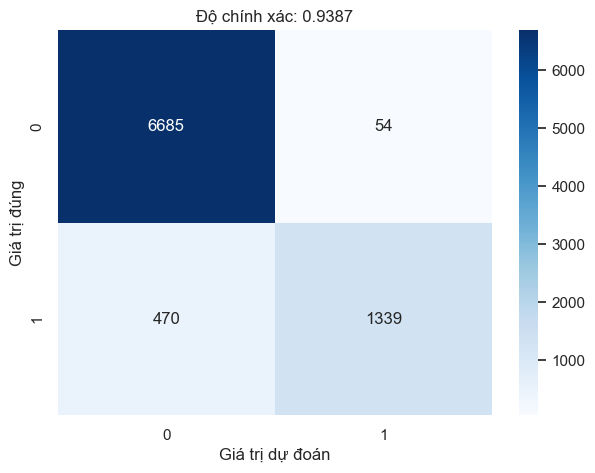



Báo cáo phân loại: 
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      6739
           1       0.96      0.74      0.84      1809

    accuracy                           0.94      8548
   macro avg       0.95      0.87      0.90      8548
weighted avg       0.94      0.94      0.94      8548



In [154]:
# Kiểm thử dự đoán
Visualize_confusion_matrix(y_test, y_pred)

## 2. Decision Tree
### Huấn Luyện Mô Hình

In [158]:
DTR_model = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
DTR_model.fit(X_train, y_train)
y_pred = DTR_model.predict(X_test)

acc2 = accuracy_score(y_test, y_pred)

In [160]:
# Train Score
train_score = DTR_model.score(X_train, y_train)
print('Training Score: %0.4f'% train_score)

Training Score: 1.0000


### Kiểm Thử Mô Hình

In [165]:
# Test score
print('DecitionTree_model: Recall: %0.4f'% recall_score(y_test, y_pred))
print('DecitionTree_model: Precision: %0.4f'% precision_score(y_test, y_pred))
print('DecitionTree_model: F1 Score: %0.4f'% f1_score(y_test, y_pred))
print('DecitionTree_model: Accuracy: %0.4f'% accuracy_score(y_test, y_pred))

DecitionTree_model: Recall: 0.7761
DecitionTree_model: Precision: 0.7245
DecitionTree_model: F1 Score: 0.7494
DecitionTree_model: Accuracy: 0.8901


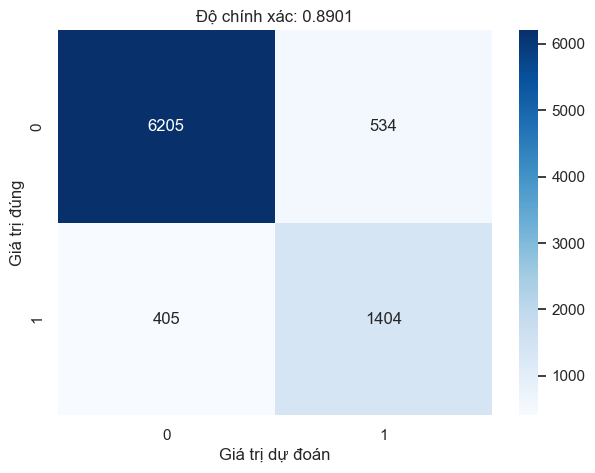



Báo cáo phân loại: 
              precision    recall  f1-score   support

           0       0.94      0.92      0.93      6739
           1       0.72      0.78      0.75      1809

    accuracy                           0.89      8548
   macro avg       0.83      0.85      0.84      8548
weighted avg       0.89      0.89      0.89      8548



In [167]:
# Test Predictions
Visualize_confusion_matrix(y_test, y_pred)

## 3. Xgboost
### Huấn Luyện Mô Hình

In [173]:
XGB_model = XGBClassifier()
XGB_model.fit(X_train, y_train)
y_pred = XGB_model.predict(X_test)

acc3 = accuracy_score(y_test, y_pred)

In [175]:
# Training Score
train_score = XGB_model.score(X_train, y_train)
print('Training Score: %.4f' % train_score)

Training Score: 0.9601


### Kiểm Thử Mô Hình

In [178]:
# Test score
print('XGB_model: Recall score: %0.4f'% recall_score(y_test, y_pred))
print('XGB_model: Precision score: %0.4f'% precision_score(y_test, y_pred))
print('XGB_model: F1-Score: %0.4f'% f1_score(y_test, y_pred))
print('XGB_model: Accuracy score: %0.4f'% accuracy_score(y_test, y_pred))

XGB_model: Recall score: 0.7441
XGB_model: Precision score: 0.9539
XGB_model: F1-Score: 0.8360
XGB_model: Accuracy score: 0.9382


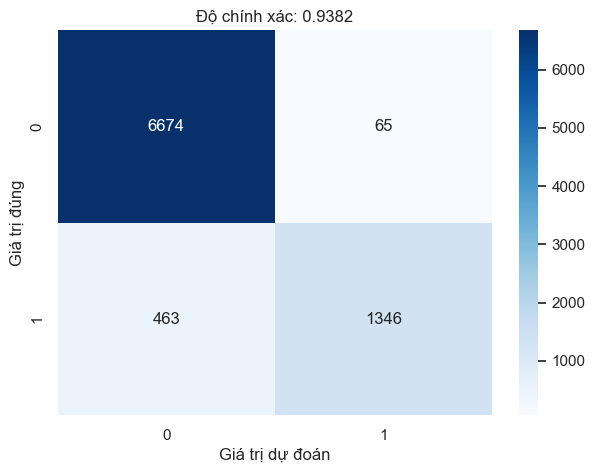



Báo cáo phân loại: 
              precision    recall  f1-score   support

           0       0.94      0.99      0.96      6739
           1       0.95      0.74      0.84      1809

    accuracy                           0.94      8548
   macro avg       0.94      0.87      0.90      8548
weighted avg       0.94      0.94      0.94      8548



In [180]:
# Test Predictions
Visualize_confusion_matrix(y_test, y_pred)

*Nhận xét: *
* *Lớp 0: Mô hình rất mạnh trong việc nhận diện các trường hợp ở lớp 0 với độ chính xác cao (94%) và recall rất tốt (99%), cho thấy khả năng phân loại chính xác khách hàng không vỡ nợ mà không bỏ sót*.
* *Lớp 1: Mô hình có độ chính xác cao (95%) đối với các dự đoán ở lớp 1, nhưng recall chỉ đạt 74%, cho thấy mô hình bỏ sót nhiều trường hợp lớp 1, điều này có thể gây khó khăn trong việc phát hiện sớm các khách hàng có nguy cơ vỡ nợ.*
* *Mức độ chênh lệch giữa score của tập Train (0.9601) và score của tập Test (0.9382) khoảng 2%. Độ chính xác của model rất cao (93.82%). Do đó, model phù hợp cho phân tích.*

## 4. Random Forest
##### Random Forest là một thuật toán học máy mạnh mẽ và phổ biến, thuộc nhóm các phương pháp ensemble learning (học máy tổ hợp), được sử dụng cho cả bài toán phân loại và hồi quy. Random Forest kết hợp nhiều cây quyết định để tạo ra một mô hình mạnh mẽ và chính xác hơn.

### Huấn luyện mô hình

In [192]:
RF_model = RandomForestClassifier(
    n_estimators=100,
    criterion='gini',
    random_state=42
)

RF_model.fit(X_train, y_train)
y_pred = RF_model.predict(X_test)

acc4 = accuracy_score(y_test, y_pred)

In [194]:
# Train Score
train_score = RF_model.score(X_train, y_train)
print('Training Score: %0.4f'% train_score)

Training Score: 1.0000


### Kiểm thử mô hình

In [199]:
# Test score
print('RF_model: Recall score: %0.4f'% recall_score(y_test, y_pred))
print('RF_model: Precision score: %0.4f'% precision_score(y_test, y_pred))
print('RF_model: F1-Score: %0.4f'% f1_score(y_test, y_pred))
print('RF_model: Accuracy score: %0.4f'% accuracy_score(y_test, y_pred))

RF_model: Recall score: 0.7286
RF_model: Precision score: 0.9734
RF_model: F1-Score: 0.8334
RF_model: Accuracy score: 0.9383


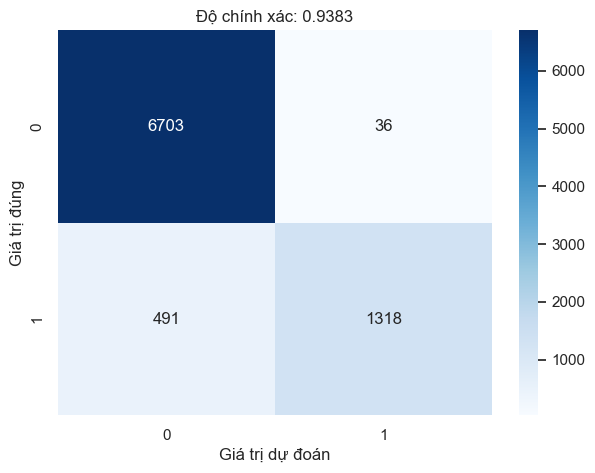



Báo cáo phân loại: 
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      6739
           1       0.97      0.73      0.83      1809

    accuracy                           0.94      8548
   macro avg       0.95      0.86      0.90      8548
weighted avg       0.94      0.94      0.93      8548



In [201]:
# Test Predictions
Visualize_confusion_matrix(y_test, y_pred)

*Nhận xét:*
* *Lớp 0: Mô hình rất mạnh trong việc nhận diện các trường hợp "Không vỡ nợ" với độ chính xác và độ thu hồi cao. Điều này cho thấy mô hình có thể phân loại chính xác khách hàng không vỡ nợ.*
* *Lớp 1: Mô hình có độ chính xác cao (97%) đối với các dự đoán "Vỡ nợ", nhưng recall chỉ đạt 73%, điều này có nghĩa là mô hình bỏ sót khá nhiều trường hợp "Vỡ nợ". Điều này có thể là một vấn đề nếu mục tiêu là phát hiện sớm các rủi ro vay nợ.*
* *Mức độ chênh lệch giữa score của tập Train (1.0000) và score của Test (0.9383) là 6% tương đối lớn, cho thấy mô hình đang có dấu hiệu overfitting. Tuy nhiên, độ chính xác của Random Forest rất cao (93.83%).*

## Đánh Giá Kết Quả
### 1. So sánh độ Chính xác của các mô hình

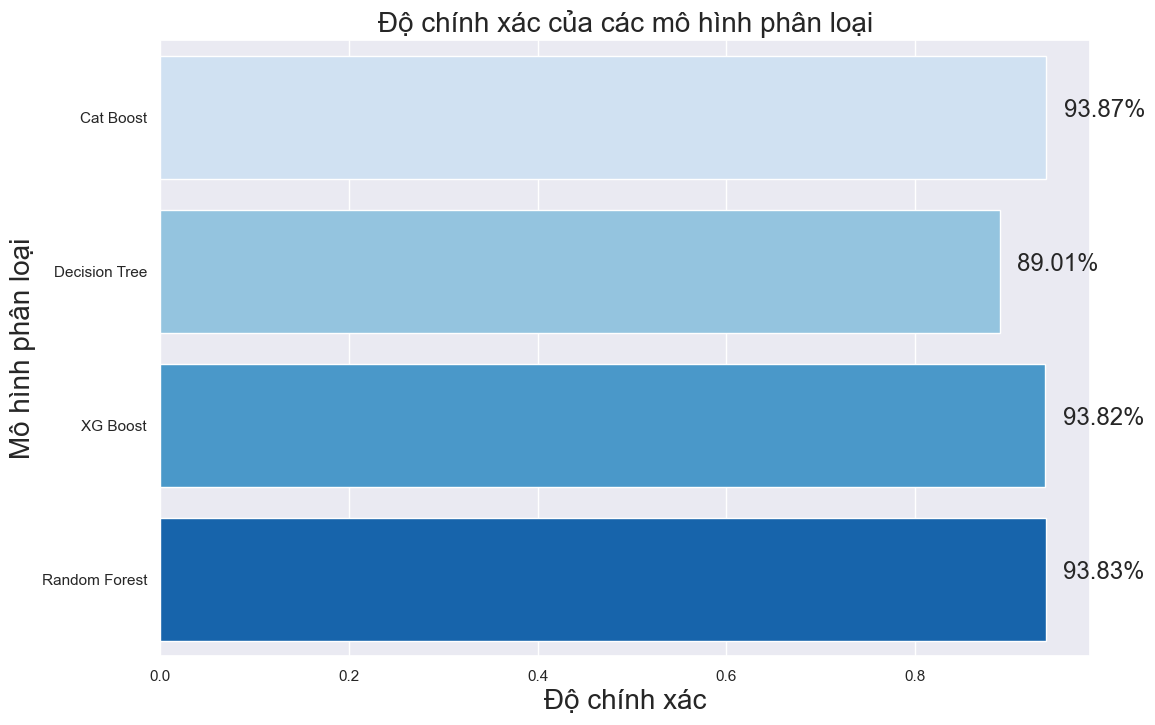

In [207]:
mylist = []
mylist2 = []

mylist2.append("Cat Boost")
mylist.append(acc1)
mylist2.append("Decision Tree")
mylist.append(acc2)
mylist2.append("XG Boost")
mylist.append(acc3)
mylist2.append("Random Forest")
mylist.append(acc4)

plt.figure(figsize=(12, 8))
sns.set_style("darkgrid")

# Tạo biểu đồ cột ngang
ax = sns.barplot(x=mylist, y=mylist2, palette="Blues", saturation=1.5)

plt.xlabel("Độ chính xác", fontsize=20)
plt.ylabel("Mô hình phân loại", fontsize=20)
plt.title("Độ chính xác của các mô hình phân loại", fontsize=20)

for p in ax.patches:
    width = p.get_width()
    x, y = p.get_xy()
    ax.annotate(f'{width:.2%}', (x + width*1.02, y + p.get_height()/2), ha='left', fontsize='x-large')

# Hiển thị biểu đồ
plt.show()


*Nhận xét:*
* *Top 3 mô hình có dộ chính xác (Accuracy) cao nhất là Random Forest, XG Boost và Cat Boost.*
* *Mô hình Cat Boost đạt độ chính xác cao nhất, 93.95%.*
* *Mô hình Decision Tree có độ chính xác thấp nhất. Mặc dù Decision Tree đơn giản và dễ hiểu, nhưng nó thường dễ bị overfitting nếu không được điều chỉnh đúng cách, điều này có thể giải thích tại sao độ chính xác của nó thấp hơn so với các mô hình khác.*
* *Do đó, trong project này, model phù hợp nhất cho dự báo Credit Risk là Cat Boost.*

### 2. Hiệu suất các mô hình

##### ROC Curve (Đường cong ROC) và AUC (Diện tích dưới đường cong) là các công cụ phổ biến trong việc đánh giá hiệu suất của các mô hình phân loại.

#### ROC - CatBoost

In [211]:
y_pred_catboost = CB_model.predict_proba(X_test)[:,1]
catboost_fpr, catboost_tpr, threshold = roc_curve(y_test, y_pred_catboost)
auc_catboost = auc(catboost_fpr, catboost_tpr)
print(f"Độ chính xác của mô hình CatBoost: {auc_catboost:.4f}")

Độ chính xác của mô hình CatBoost: 0.9459


#### ROC - Decision Tree

In [214]:
y_pred_dtr = DTR_model.predict_proba(X_test)[:,1]
dtr_fpr, dtr_tpr, threshold = roc_curve(y_test, y_pred_dtr)
auc_dtr = auc(dtr_fpr, dtr_tpr)
print(f"Độ chính xác của mô hình Decision Tree: {auc_dtr:.4f}")

Độ chính xác của mô hình Decision Tree: 0.8484


#### ROC - XG Boost

In [217]:
y_pred_xgb = XGB_model.predict_proba(X_test)[:,1]
xgb_fpr, xgb_tpr, threshold = roc_curve(y_test, y_pred_xgb)
auc_xgb = auc(xgb_fpr, xgb_tpr)
print(f"Độ chính xác của mô hình XG Boost: {auc_xgb:.4f}")

Độ chính xác của mô hình XG Boost: 0.9460


### ROC - Random Forest

In [220]:
y_pred_rfc = RF_model.predict_proba(X_test)[:,1]
rfc_fpr, rfc_tpr, threshold = roc_curve(y_test, y_pred_rfc)
auc_rfc = auc(rfc_fpr, rfc_tpr)
print(f"Độ chính xác của mô hình Random Forest: {auc_rfc:.4f}")

Độ chính xác của mô hình Random Forest: 0.9323


### ROC - Plotting Graph

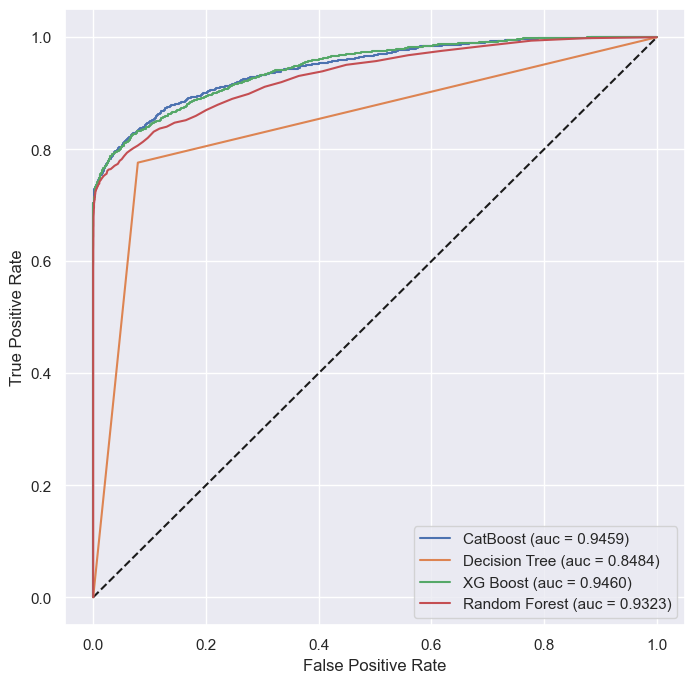

In [223]:
plt.figure(figsize=(8, 8), dpi=100)
plt.plot([0, 1], [0, 1], 'k--')
# CatBoost
plt.plot(catboost_fpr, catboost_tpr, label='CatBoost (auc = %0.4f)' % auc_catboost)
# Decision Tree
plt.plot(dtr_fpr, dtr_tpr, label='Decision Tree (auc = %0.4f)' % auc_dtr)
# XGBoost
plt.plot(xgb_fpr, xgb_tpr, label='XG Boost (auc = %0.4f)' % auc_xgb)
# Random Forest
plt.plot(rfc_fpr, rfc_tpr, label='Random Forest (auc = %0.4f)' % auc_rfc)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend(loc='best')
plt.show();

## 3. Những đặc trưng quan trọng

#### CATBOOST

In [227]:
feature_importance = pd.DataFrame({'feature': X_train.columns,
                                   'importance': CB_model.feature_importances_})

new_features_df = feature_importance[feature_importance['importance']>0
                                    ].sort_values(by=['importance'],ascending=False)

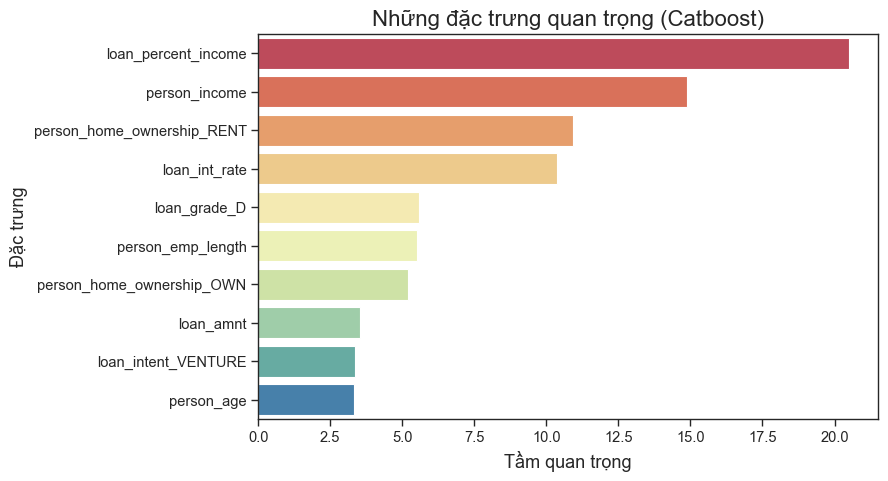

In [229]:
sns.set(context='paper', style='ticks',  font='sans-serif',
        font_scale=1.2, color_codes=True, rc=None)
figure, ax = plt.subplots(figsize=(8, 5))
ax=sns.barplot(data = new_features_df[:10],
              y='feature',
              x='importance',
              palette='Spectral')
ax.set_title('Những đặc trưng quan trọng (Catboost)', fontsize=16)
ax.set_xlabel('Tầm quan trọng', fontsize=13)
ax.set_ylabel('Đặc trưng', fontsize=13)
plt.show()

#### XGBOOST

In [232]:
feature_importance = pd.DataFrame({'feature': X_train.columns,
                                   'importance': XGB_model.feature_importances_})

new_features_df = feature_importance[feature_importance['importance']>0
                                    ].sort_values(by=['importance'],ascending=False)

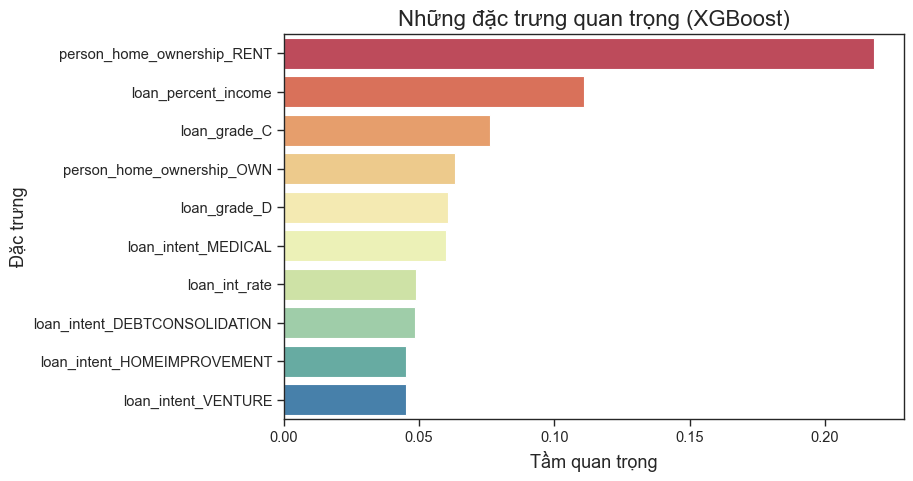

In [234]:
sns.set(context='paper', style='ticks',  font='sans-serif',
        font_scale=1.2, color_codes=True, rc=None)
figure, ax = plt.subplots(figsize=(8, 5))
ax=sns.barplot(data = new_features_df[:10],
              y='feature',
              x='importance',
              palette='Spectral')
ax.set_title('Những đặc trưng quan trọng (XGBoost)', fontsize=16)
ax.set_xlabel('Tầm quan trọng', fontsize=13)
ax.set_ylabel('Đặc trưng', fontsize=13)
plt.show()

# Kết Luận

# Lưu Mô Hình Dự Đoán Để Triển Khai Trên Streamlit

In [238]:
# Lưu mô hình CatBoots
joblib.dump(CB_model,'catboost_model.pkl')

['catboost_model.pkl']